In [617]:
import pandas as pd
import numpy as np

In [618]:
#Read the neighbourhood data
#CSV downloaded from: https://data.edmonton.ca/Geospatial-Boundaries/City-of-Edmonton-Neighbourhood-Boundaries/jfvj-x253
df = pd.read_csv('NEIGHBOURHOODS_SHAPE_2.csv')
pd.options.display.max_columns = 75
pd.options.display.max_rows = 50
df = df.replace({'\)':''}, regex=True) #clean up the trailing parentheses
df = df.replace(r'^\s*$', np.nan, regex=True) #replace empty cells with NaN
df.tail(6)

NAME NUMBER  AREA_KM2  \
395  Winterburn Industrial Area West  4,670  4.340206   
396                        Woodcroft  3,450  1.291675   
397         Yellowhead Corridor East  1,270  1.430509   
398         Yellowhead Corridor West  1,280  1.164862   
399                             York  2,720  1.188834   
400            Youngstown Industrial  4,660  0.483841   

                                  the_geom  \
395   -113.7137069813738 53.54119743232371   
396  -113.56570359212786 53.56908921523379   
397  -113.44511314016736 53.58363617864351   
398  -113.5371377601615 53.583475118730924   
399  -113.42930360518905 53.60689611803747   
400  -113.60517306486945 53.55594869912666   

                                  Unnamed: 4  \
395   -113.71370760207304 53.541197440926986   
396     -113.56580890235425 53.5693389584453   
397    -113.44508586880151 53.58364163250797   
398   -113.53774365225462 53.583475287927754   
399   -113.42567596887035 53.606890645566516   
400      -113.60599403987788 53.554934332901   

                                  Unnamed: 5  \
395    -113.71370784198724 53.54130710804342   
396    -113.56579181475891 53.57036767647372   
397    -113.44505863846918 53.58364728768554   
398     -113.5378908603555 53.58347532857805   
399   -113.42367066492281 53.606890904998366   
400     -113.606018307744 53.554904347597464   

                                  Unnamed: 6  \
395    -113.71372333852358 53.54852761843802   
396    -113.56137885746547 53.57031018169771   
397   -113.44503145065639 53.583653143867586   
398     -113.53862777044307 53.5834755405471   
399    -113.42281575158667 53.60688785857662   
400   -113.60841683818273 53.551940495442764   

                                  Unnamed: 7  \
395     -113.71373418628055 53.5543789475511   
396   -113.55800123993943 53.570297480049135   
397    -113.44500451679102 53.58365915307917   
398    -113.53936466004365 53.58347573861976   
399    -113.41988914790257 53.60688397593324   
400    -113.60891317465548 53.55126606828388   

                                 Unnamed: 8  \
395    -113.71373424081307 53.5544083626072   
396   -113.55633527461696 53.57029308690464   
397    -113.4449776276975 53.58366535955785   
398   -113.53951964627667 53.58347577967383   
399   -113.41762997156476 53.60691094105942   
400   -113.61021842410561 53.54949236878544   

                                 Unnamed: 9  \
395    -113.7135514609591 53.55440962292505   
396   -113.55465131750458 53.57029147125062   
397   -113.44495078482063 53.58367176297014   
398    -113.54039760016218 53.5834760083613   
399    -113.4183859998353 53.60508050121137   
400   -113.61099423066275 53.54843805004795   

                                 Unnamed: 10  \
395    -113.71335496158552 53.55441097753121   
396    -113.55127362562511 53.57027613603173   
397     -113.44403671343107 53.5836653970449   
398    -113.54076140008767 53.58347609845516   
399     -113.4185558832971 53.60439220768963   
400   -113.61266655987812 53.546320590181715   

                                 Unnamed: 11  \
395   -113.70432945471343 53.554521572201786   
396    -113.5493791743313 53.570281133679174   
397   -113.44312861861931 53.583658866824756   
398    -113.54093670833872 53.58347615685732   
399    -113.4185107111145 53.603787683764146   
400   -113.61387272569779 53.544975476564616   

                                 Unnamed: 12  \
395    -113.70432698657969 53.55217554195141   
396   -113.54945741196873 53.568433149418524   
397    -113.44293404850572 53.58365862007449   
398    -113.54103408991948 53.58347618039961   
399    -113.41825551970486 53.60340242453437   
400    -113.61491771166081 53.54379066938818   

                                 Unnamed: 13  \
395    -113.70432312757849 53.54850803743901   
396   -113.54946863322378 53.567377334682156   
397    -113.44294100842086 53.58245755222603   
398    -113.54117231787278 53.58347692129351   
399   -113.41778125628659 53.602978593756745   
40

In [619]:
#Separate the Latitude and Longitude coordinates into their own dataframes to compute neighbourhood centroids

dfLat= df.iloc[:,3].str.split(' ').str[1].astype(float).to_frame() #later columns have an inital space so initialize the first column
dfLong= df.iloc[:,3].str.split(' ').str[0].astype(float).to_frame() #later columns have an inital space so initialize the first column

for i in range(4,len(dfGPS.columns)):       
        dfLat[i]=df.iloc[:,i].str.split(' ').str[2]
        dfLong[i]=df.iloc[:,i].str.split(' ').str[1]
        
#convert to float
dfLat = dfLat.apply(pd.to_numeric)
dfLong = dfLong.apply(pd.to_numeric)


In [620]:
#some long's get parsed wrong so just remove them for the average calculation
for i in range(4,len(dfGPS.columns)):       
        dfLong[i].loc[(dfLong[i] > 1.0)] = np.nan

In [621]:
#Compute the latitude and longitude centroids, then create a new dataframe with only the needed columns

dfLat['mean'] = dfLat.mean(axis=1, skipna = True)
dfLong['mean'] = dfLong.mean(axis=1, skipna = True)

dfEdmonton = df[['NAME']]
dfEdmonton['Latitude'] = dfLat[['mean']]
dfEdmonton['Longitude'] = dfLong[['mean']]
dfEdmonton.rename(columns={'NAME':'Neighborhood'}, inplace = True)
dfEdmonton.tail(6)

<ipython-input-621-e7aae74bdeb5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfEdmonton['Latitude'] = dfLat[['mean']]
<ipython-input-621-e7aae74bdeb5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfEdmonton['Longitude'] = dfLong[['mean']]
c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

Neighborhood   Latitude   Longitude
395  Winterburn Industrial Area West  53.553555 -113.701469
396                        Woodcroft  53.565543 -113.557051
397         Yellowhead Corridor East  53.581239 -113.459361
398         Yellowhead Corridor West  53.582963 -113.529320
399                             York  53.603784 -113.429378
400            Youngstown Industrial  53.549405 -113.612230

In [622]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import folium # map rendering library

import requests
import json
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

In [623]:
address = 'Edmonton, AB'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Edmonton are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Edmonton are 53.535411, -113.507996.


In [624]:
# create map of Edmonton using latitude and longitude values
map_edmonton = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(dfEdmonton['Latitude'], dfEdmonton['Longitude'], dfEdmonton['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_edmonton)  

map_edmonton

In [486]:
#Explore the neighborhoods in Foursquare

CLIENT_ID = 'DI1IROLVKDMIMPBFVKAOIDWSEJDVGIKEFDQW4QDEVY3PSVKE' # your Foursquare ID
CLIENT_SECRET = '5CLO0VAMN11K1LQL2S35NKALY02AZ2BTWM4UAON2LQNBS2WF' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: DI1IROLVKDMIMPBFVKAOIDWSEJDVGIKEFDQW4QDEVY3PSVKE
CLIENT_SECRET:5CLO0VAMN11K1LQL2S35NKALY02AZ2BTWM4UAON2LQNBS2WF


In [411]:
LIMIT = 20 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius in metres
section = 'coffee' #search for only coffee shops
numCoffeeShopsList = []
topCoffeeShopIdList = []

for i in range(0,len(dfEdmonton)):

    neighborhood_latitude = dfEdmonton.loc[i, 'Latitude'] # neighborhood latitude value
    neighborhood_longitude = dfEdmonton.loc[i, 'Longitude'] # neighborhood longitude value
    neighborhood_name = dfEdmonton.loc[i, 'Neighborhood'] # neighborhood name

    # create URL
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&section={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        neighborhood_latitude, 
        neighborhood_longitude, 
        radius, 
        LIMIT,
        section)
    
    results = requests.get(url).json()
     
    venues = results['response']['groups'][0]['items']
    
    nearby_venues = json_normalize(venues) # flatten JSON

    # filter columns
    filtered_columns = ['venue.name', 'venue.id', 'venue.location.lat', 'venue.location.lng']
    try:
        nearby_venues = nearby_venues.loc[:, filtered_columns]     
        nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns] # clean columns
        topCoffeeShopIdList.append(nearby_venues.loc[0,'id'])
    except KeyError:
        topCoffeeShopIdList.append(-1)

    numCoffeeShopsList.append(len(nearby_venues))

<ipython-input-411-a746075690cb>:28: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues) # flatten JSON


In [414]:
len(topCoffeeShopIdList) #check to make sure all locations were checked

401

In [413]:
len(numCoffeeShopsList)

401

In [525]:
import time
topCoffeeShopRatings = []

for i in topCoffeeShopIdList:
    if (i != -1): #
        venue_id = i

        # create URL
        url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
        url # display URL
               
        results = requests.get(url).json()
        print (results)
        
        try:
            rating = results['response']['venue']['rating']
            topCoffeeShopRatings.append(rating)
            print (rating)
        except KeyError:
            topCoffeeShopRatings.append(np.nan)
            print (np.nan)
        
    else:
        topCoffeeShopRatings.append(np.nan) #where no coffee shop rating available
        print (np.nan)
        
    time.sleep(1)

{'meta': {'code': 200, 'requestId': '5f2757668f44ac7ed5821f9d'}, 'response': {'venue': {'id': '4baff56af964a5205d2e3ce3', 'name': 'Tim Hortons', 'contact': {'phone': '7804771115', 'formattedPhone': '(780) 477-1115', 'twitter': 'timhortons'}, 'location': {'address': '3522 118th Ave Nw', 'crossStreet': 'beside Shell', 'lat': 53.570728407218226, 'lng': -113.39624404907227, 'labeledLatLngs': [{'label': 'display', 'lat': 53.570728407218226, 'lng': -113.39624404907227}], 'postalCode': 'T5W 0Z4', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['3522 118th Ave Nw (beside Shell)', 'Edmonton AB T5W 0Z4', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/tim-hortons/4baff56af964a5205d2e3ce3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d4

{'meta': {'code': 200, 'requestId': '5f27559d0070593f9d400796'}, 'response': {'venue': {'id': '4c229b3b99282d7f986d67b0', 'name': 'The Carrot Community Arts Coffeehouse', 'contact': {'phone': '7804711580', 'formattedPhone': '(780) 471-1580', 'twitter': 'artsontheave', 'facebook': '134358063379101', 'facebookUsername': 'TheCarrotCoffeehouse', 'facebookName': 'The Carrot Community Arts Coffeehouse'}, 'location': {'address': '9351 118 Ave NW', 'lat': 53.570275525983156, 'lng': -113.48555858294544, 'labeledLatLngs': [{'label': 'display', 'lat': 53.570275525983156, 'lng': -113.48555858294544}], 'postalCode': 'T5G 0N3', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['9351 118 Ave NW', 'Edmonton AB T5G 0N3', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/artsontheave', 'categories': [{'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_'

{'meta': {'code': 200, 'requestId': '5f2756908b9c0f542657ebab'}, 'response': {'venue': {'id': '4c810e4bd8086dcb04fc6852', 'name': 'Tim Hortons', 'contact': {'phone': '7804475586', 'formattedPhone': '(780) 447-5586', 'twitter': 'timhortons'}, 'location': {'address': '15606 111th Ave Nw', 'crossStreet': '156 St', 'lat': 53.559622113213806, 'lng': -113.59139420092106, 'labeledLatLngs': [{'label': 'display', 'lat': 53.559622113213806, 'lng': -113.59139420092106}], 'postalCode': 'T5M 2R7', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['15606 111th Ave Nw (156 St)', 'Edmonton AB T5M 2R7', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/tim-hortons/4c810e4bd8086dcb04fc6852', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats':

{'meta': {'code': 200, 'requestId': '5f27588e7455323d640626ed'}, 'response': {'venue': {'id': '5aca1dccf62e097e2bc4c5c0', 'name': 'Tim Hortons', 'contact': {'phone': '8255109899', 'formattedPhone': '(825) 510-9899'}, 'location': {'address': '361 Allard Blvd Sw', 'lat': 53.397025318061736, 'lng': -113.52906837960313, 'labeledLatLngs': [{'label': 'display', 'lat': 53.397025318061736, 'lng': -113.52906837960313}], 'postalCode': 'T6W 0J2', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['361 Allard Blvd Sw', 'Edmonton AB T6W 0J2', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/tim-hortons/5aca1dccf62e097e2bc4c5c0', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 1}, 'url': 'https://www.timhortons.ca/store-l

{'meta': {'code': 200, 'requestId': '5f275700b746232b300dae83'}, 'response': {'venue': {'id': '4f4957fce4b0e7e90fb46782', 'name': 'Starbucks', 'contact': {'phone': '7804364064', 'formattedPhone': '(780) 436-4064', 'twitter': 'starbucks', 'facebook': '22092443056', 'facebookUsername': 'Starbucks', 'facebookName': 'Starbucks'}, 'location': {'address': '5110 Windermere Blvd NW, Safeway Grocery Store', 'crossStreet': 'inside Safeway', 'lat': 53.435027, 'lng': -113.599883, 'labeledLatLngs': [{'label': 'display', 'lat': 53.435027, 'lng': -113.599883}], 'postalCode': 'T6W 0H7', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['5110 Windermere Blvd NW, Safeway Grocery Store (inside Safeway)', 'Edmonton AB T6W 0H7', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/starbucks/4f4957fce4b0e7e90fb46782', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'h

nan
{'meta': {'code': 200, 'requestId': '5f27579dcc2d4f2e20e91140'}, 'response': {'venue': {'id': '59d1327c95d9860bceeb3b78', 'name': 'Awake Coffee House', 'contact': {}, 'location': {'address': '11029 9 Ave NW', 'crossStreet': '111 St. NW', 'lat': 53.439067, 'lng': -113.517579, 'labeledLatLngs': [{'label': 'display', 'lat': 53.439067, 'lng': -113.517579}], 'postalCode': 'T6J 5R9', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['11029 9 Ave NW (111 St. NW)', 'Edmonton AB T6J 5R9', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/awake-coffee-house/59d1327c95d9860bceeb3b78', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d10f951735', 'name': 'Pharmacy', 'pluralName': 'Pharmacies', 'shortName': 'Pharmacy', 'icon': {'prefix':

nan
{'meta': {'code': 200, 'requestId': '5f27575fe9a64d4c6eb24b47'}, 'response': {'venue': {'id': '4b0ecf24f964a5205b5b23e3', 'name': 'Tim Hortons', 'contact': {'phone': '7804449339', 'formattedPhone': '(780) 444-9339', 'twitter': 'timhortons'}, 'location': {'address': '18314 Lessard Rd', 'crossStreet': "near Sobey's", 'lat': 53.4862277796862, 'lng': -113.64149987697596, 'labeledLatLngs': [{'label': 'display', 'lat': 53.4862277796862, 'lng': -113.64149987697596}], 'postalCode': 'T6M 2W8', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ["18314 Lessard Rd (near Sobey's)", 'Edmonton AB T6M 2W8', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/tim-hortons/4b0ecf24f964a5205b5b23e3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d489

{'meta': {'code': 200, 'requestId': '5f275773780c33707107e612'}, 'response': {'venue': {'id': '4c114c9772caa593e4465da4', 'name': 'Tim Hortons', 'contact': {'phone': '5874993925', 'formattedPhone': '(587) 499-3925', 'twitter': 'timhortons'}, 'location': {'address': '6110 Currents Dr', 'crossStreet': 'Walmart', 'lat': 53.4380698, 'lng': -113.6002044, 'labeledLatLngs': [{'label': 'display', 'lat': 53.4380698, 'lng': -113.6002044}], 'postalCode': 'T6W 0L7', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['6110 Currents Dr (Walmart)', 'Edmonton AB T6W 0L7', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/tim-hortons/4c114c9772caa593e4465da4', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 3}, 'url': 'https:

{'meta': {'code': 200, 'requestId': '5f2756de7919ac60d9d1be80'}, 'response': {'venue': {'id': '4babcdecf964a52002cb3ae3', 'name': 'Tim Hortons', 'contact': {'twitter': 'timhortons'}, 'location': {'lat': 53.57339701957871, 'lng': -113.61300945281981, 'labeledLatLngs': [{'label': 'display', 'lat': 53.57339701957871, 'lng': -113.61300945281981}], 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['Edmonton AB', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/tim-hortons/4babcdecf964a52002cb3ae3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0}, 'url': 'http://www.timhortons.com', 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 0, 'groups': []}, 'dislike': False, 'ok': False, 'r

nan
{'meta': {'code': 200, 'requestId': '5f2756962378a6144b897c4f'}, 'response': {'venue': {'id': '5102d92de4b0e616c94cd899', 'name': 'Jacquelines Cafe', 'contact': {}, 'location': {'lat': 53.58518851739045, 'lng': -113.56402535566909, 'labeledLatLngs': [{'label': 'display', 'lat': 53.58518851739045, 'lng': -113.56402535566909}], 'cc': 'CA', 'country': 'Canada', 'formattedAddress': ['Canada']}, 'canonicalUrl': 'https://foursquare.com/v/jacquelines-cafe/5102d92de4b0e616c94cd899', 'categories': [{'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 0, 'groups': []}, 'dislike': False, 'ok': False, 'allowMenuUrlEdit': True, 'beenHere': {'count': 0, 'unconfirmedCount': 0, 'marked': False, 'lastCheckinExpiredAt': 0}, 'spec

{'meta': {'code': 200, 'requestId': '5f2755d672cee757fc74a751'}, 'response': {'venue': {'id': '4bb78082b35776b069abc701', 'name': 'Tim Hortons', 'contact': {'phone': '7804721627', 'formattedPhone': '(780) 472-1627', 'twitter': 'timhortons'}, 'location': {'address': '2943 137th Ave', 'crossStreet': '29 St/Victoria Trail', 'lat': 53.59914746901067, 'lng': -113.38821248849854, 'labeledLatLngs': [{'label': 'display', 'lat': 53.59914746901067, 'lng': -113.38821248849854}], 'postalCode': 'T5A 5G8', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['2943 137th Ave (29 St/Victoria Trail)', 'Edmonton AB T5A 5G8', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/tim-hortons/4bb78082b35776b069abc701', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}, {'id': '4b

{'meta': {'code': 200, 'requestId': '5f2756e87919ac60d9d1da5c'}, 'response': {'venue': {'id': '4c5704b46201e21e9d82196e', 'name': '7-Eleven', 'contact': {'phone': '7804572590', 'formattedPhone': '(780) 457-2590', 'twitter': '7elevencanada', 'facebook': '131139770265587', 'facebookUsername': '7ElevenCanadaEdmonton24309', 'facebookName': '7-Eleven Canada'}, 'location': {'address': '11868 145th Ave', 'lat': 53.607632049151604, 'lng': -113.52740406990051, 'labeledLatLngs': [{'label': 'display', 'lat': 53.607632049151604, 'lng': -113.52740406990051}], 'postalCode': 'T5X 2E3', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['11868 145th Ave', 'Edmonton AB T5X 2E3', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/7eleven/4c5704b46201e21e9d82196e', 'categories': [{'id': '4d954b0ea243a5684a65b473', 'name': 'Convenience Store', 'pluralName': 'Convenience Stores', 'shortName': 'Convenience Store', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categori

{'meta': {'code': 200, 'requestId': '5f2757412119245df426aa2f'}, 'response': {'venue': {'id': '4b58bb43f964a520006828e3', 'name': 'Take 5', 'contact': {}, 'location': {'address': '11801 48 St.', 'lat': 53.57045332579517, 'lng': -113.414897489532, 'labeledLatLngs': [{'label': 'display', 'lat': 53.57045332579517, 'lng': -113.414897489532}], 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['11801 48 St.', 'Edmonton AB', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/take-5/4b58bb43f964a520006828e3', 'categories': [{'id': '4bf58dd8d48988d148941735', 'name': 'Donut Shop', 'pluralName': 'Donut Shops', 'shortName': 'Donuts', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/donuts_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}}], '

{'meta': {'code': 200, 'requestId': '5f2757c39675546b5d77c579'}, 'response': {'venue': {'id': '4b5e38e2f964a5209c8429e3', 'name': 'Starbucks', 'contact': {'phone': '7804906599', 'formattedPhone': '(780) 490-6599', 'twitter': 'starbucks', 'facebook': '22092443056', 'facebookUsername': 'Starbucks', 'facebookName': 'Starbucks'}, 'location': {'address': '1751 102 St NW', 'crossStreet': 'South Edmonton Common', 'lat': 53.44528, 'lng': -113.49101, 'labeledLatLngs': [{'label': 'display', 'lat': 53.44528, 'lng': -113.49101}], 'postalCode': 'T6N 0B1', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['1751 102 St NW (South Edmonton Common)', 'Edmonton AB T6N 0B1', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/starbucks/4b5e38e2f964a5209c8429e3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_

{'meta': {'code': 200, 'requestId': '5f27571676ab466e804443d0'}, 'response': {'venue': {'id': '4b392699f964a5203f5725e3', 'name': 'Tim Hortons', 'contact': {'phone': '7804489722', 'formattedPhone': '(780) 448-9722', 'twitter': 'timhortons'}, 'location': {'address': '9902 153rd Ave Nw', 'crossStreet': '97 Street NW', 'lat': 53.614495138777436, 'lng': -113.49427610635763, 'labeledLatLngs': [{'label': 'display', 'lat': 53.614495138777436, 'lng': -113.49427610635763}], 'postalCode': 'T5X 6A4', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['9902 153rd Ave Nw (97 Street NW)', 'Edmonton AB T5X 6A4', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/tim-hortons/4b392699f964a5203f5725e3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d4

{'meta': {'code': 200, 'requestId': '5f2757c69675546b5d77cda0'}, 'response': {'venue': {'id': '4c9650f2f7cfa1cd2520c515', 'name': 'Gracious Goods', 'contact': {}, 'location': {'address': '7609 115 St NW', 'lat': 53.51238982066316, 'lng': -113.5285375204236, 'labeledLatLngs': [{'label': 'display', 'lat': 53.51238982066316, 'lng': -113.5285375204236}], 'postalCode': 'T6G', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['7609 115 St NW', 'Edmonton AB T6G', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/gracious-goods/4c9650f2f7cfa1cd2520c515', 'categories': [{'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 4}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'hasMenu': True, 'likes': {'count': 2, 'groups': [{'type': 'others', 'count': 2,

{'meta': {'code': 200, 'requestId': '5f2757cb6cf9db736bff3ff7'}, 'response': {'venue': {'id': '4b063056f964a52094e922e3', 'name': 'Mandolin Books & Coffee', 'contact': {'phone': '7804794050', 'formattedPhone': '(780) 479-4050', 'twitter': 'mandolinbooks', 'facebook': '47952719731', 'facebookUsername': 'MandolinBooks', 'facebookName': 'Mandolin Books and Coffee Company'}, 'location': {'address': '6419 112 Ave', 'crossStreet': '65 St.', 'lat': 53.56489204825991, 'lng': -113.43737670352883, 'labeledLatLngs': [{'label': 'display', 'lat': 53.56489204825991, 'lng': -113.43737670352883}], 'postalCode': 'T5W 0N9', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['6419 112 Ave (65 St.)', 'Edmonton AB T5W 0N9', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/mandolin-books--coffee/4b063056f964a52094e922e3', 'categories': [{'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sq

nan
{'meta': {'code': 200, 'requestId': '5f2756c02c47b45976d1bf16'}, 'response': {'venue': {'id': '55e35a15498e77eff694d799', 'name': "lindsay's relaxation haus", 'contact': {}, 'location': {'lat': 53.585927, 'lng': -113.395647, 'labeledLatLngs': [{'label': 'display', 'lat': 53.585927, 'lng': -113.395647}], 'cc': 'CA', 'country': 'Canada', 'formattedAddress': ['Canada']}, 'canonicalUrl': 'https://foursquare.com/v/lindsays-relaxation-haus/55e35a15498e77eff694d799', 'categories': [{'id': '4bf58dd8d48988d1dc931735', 'name': 'Tea Room', 'pluralName': 'Tea Rooms', 'shortName': 'Tea Room', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/tearoom_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0}, 'price': {'tier': 2, 'message': 'Moderate', 'currency': '$'}, 'likes': {'count': 0, 'groups': []}, 'dislike': False, 'ok': False, 'allowMenuUrlEdit': True, 'beenHere': {'count': 0, 'unconfirmedCount': 0, 'marked': False, 'lastCheckinExpiredAt': 0}, 's

nan
{'meta': {'code': 200, 'requestId': '5f275563c8e3474a3932fcc8'}, 'response': {'venue': {'id': '4b58bb43f964a520006828e3', 'name': 'Take 5', 'contact': {}, 'location': {'address': '11801 48 St.', 'lat': 53.57045332579517, 'lng': -113.414897489532, 'labeledLatLngs': [{'label': 'display', 'lat': 53.57045332579517, 'lng': -113.414897489532}], 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['11801 48 St.', 'Edmonton AB', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/take-5/4b58bb43f964a520006828e3', 'categories': [{'id': '4bf58dd8d48988d148941735', 'name': 'Donut Shop', 'pluralName': 'Donut Shops', 'shortName': 'Donuts', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/donuts_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}}

{'meta': {'code': 200, 'requestId': '5f27547d5016ad2441894128'}, 'response': {'venue': {'id': '4b168c63f964a5203aba23e3', 'name': 'Tim Hortons', 'contact': {'phone': '7804500066', 'formattedPhone': '(780) 450-0066'}, 'location': {'address': '3351 34th St Nw', 'crossStreet': 'Silverberry', 'lat': 53.4631812187652, 'lng': -113.392952531685, 'labeledLatLngs': [{'label': 'display', 'lat': 53.4631812187652, 'lng': -113.392952531685}], 'postalCode': 'T6T 0B5', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['3351 34th St Nw (Silverberry)', 'Edmonton AB T6T 0B5', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/tim-hortons/4b168c63f964a5203aba23e3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 5}, 'url': 'htt

{'meta': {'code': 200, 'requestId': '5f2757eea3822e313d3d8d9c'}, 'response': {'venue': {'id': '4b071bd6f964a52066f722e3', 'name': 'Starbucks', 'contact': {'phone': '7804353081', 'formattedPhone': '(780) 435-3081', 'twitter': 'starbucks', 'facebook': '22092443056', 'facebookUsername': 'Starbucks', 'facebookName': 'Starbucks'}, 'location': {'address': '961 James Mowatt Tr, #106', 'crossStreet': 'Southbrook - Ellerslie Rd & 111 St.', 'lat': 53.423713, 'lng': -113.513975, 'labeledLatLngs': [{'label': 'display', 'lat': 53.423713, 'lng': -113.513975}], 'postalCode': 'T6W 1S4', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['961 James Mowatt Tr, #106 (Southbrook - Ellerslie Rd & 111 St.)', 'Edmonton AB T6W 1S4', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/starbucks/4b071bd6f964a52066f722e3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'h

{'meta': {'code': 200, 'requestId': '5f27578558005e361f4b6885'}, 'response': {'venue': {'id': '4b975067f964a52049ff34e3', 'name': '7-Eleven', 'contact': {'phone': '7804392618', 'formattedPhone': '(780) 439-2618', 'twitter': '7elevencanada', 'facebook': '1057573090965735', 'facebookUsername': '7ElevenCanadaEdmonton32316', 'facebookName': '7-Eleven Canada'}, 'location': {'address': '1903 111st Street', 'lat': 53.4490854, 'lng': -113.5154856, 'labeledLatLngs': [{'label': 'display', 'lat': 53.4490854, 'lng': -113.5154856}], 'postalCode': 'T6J 7E7', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['1903 111st Street', 'Edmonton AB T6J 7E7', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/7eleven/4b975067f964a52049ff34e3', 'categories': [{'id': '4d954b0ea243a5684a65b473', 'name': 'Convenience Store', 'pluralName': 'Convenience Stores', 'shortName': 'Convenience Store', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/conveniencest

{'meta': {'code': 200, 'requestId': '5f27556cc8e3474a393315dd'}, 'response': {'venue': {'id': '4baecc5df964a520edd83be3', 'name': '7-Eleven', 'contact': {'phone': '7804386417', 'formattedPhone': '(780) 438-6417', 'twitter': '7elevencanada', 'facebook': '144614998910403', 'facebookUsername': '7ElevenCanadaEdmonton33470', 'facebookName': '7-Eleven Canada'}, 'location': {'address': '280 Saddleback Road', 'crossStreet': 'in Blue Quill', 'lat': 53.4610403, 'lng': -113.529292, 'labeledLatLngs': [{'label': 'display', 'lat': 53.4610403, 'lng': -113.529292}], 'postalCode': 'T6J 4R7', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['280 Saddleback Road (in Blue Quill)', 'Edmonton AB T6J 4R7', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/7eleven/4baecc5df964a520edd83be3', 'categories': [{'id': '4d954b0ea243a5684a65b473', 'name': 'Convenience Store', 'pluralName': 'Convenience Stores', 'shortName': 'Convenience Store', 'icon': {'prefix': 'https://s

{'meta': {'code': 200, 'requestId': '5f27550dfdaeb56b6eaed0db'}, 'response': {'venue': {'id': '5102d92de4b0e616c94cd899', 'name': 'Jacquelines Cafe', 'contact': {}, 'location': {'lat': 53.58518851739045, 'lng': -113.56402535566909, 'labeledLatLngs': [{'label': 'display', 'lat': 53.58518851739045, 'lng': -113.56402535566909}], 'cc': 'CA', 'country': 'Canada', 'formattedAddress': ['Canada']}, 'canonicalUrl': 'https://foursquare.com/v/jacquelines-cafe/5102d92de4b0e616c94cd899', 'categories': [{'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 0, 'groups': []}, 'dislike': False, 'ok': False, 'allowMenuUrlEdit': True, 'beenHere': {'count': 0, 'unconfirmedCount': 0, 'marked': False, 'lastCheckinExpiredAt': 0}, 'specials

{'meta': {'code': 200, 'requestId': '5f2755bbd736fc78bc4f27ca'}, 'response': {'venue': {'id': '4d27cdff342d6dcb64c0f1ca', 'name': "Café O' Play", 'contact': {'phone': '7807587529', 'formattedPhone': '(780) 758-7529'}, 'location': {'address': '5667 Riverbend Rd', 'lat': 53.49510773611629, 'lng': -113.57739978283918, 'labeledLatLngs': [{'label': 'display', 'lat': 53.49510773611629, 'lng': -113.57739978283918}], 'postalCode': 'T6H 5K4', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['5667 Riverbend Rd', 'Edmonton AB T6H 5K4', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/caf%C3%A9-o-play/4d27cdff342d6dcb64c0f1ca', 'categories': [{'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d1e7941735', 'name': 'Playground', 'pluralName': 'Playgrounds', 'shortName': 'Playground',

{'meta': {'code': 200, 'requestId': '5f2757e39675546b5d782038'}, 'response': {'venue': {'id': '4ba532aaf964a520a1ea38e3', 'name': '7-Eleven', 'contact': {'phone': '7804668314', 'formattedPhone': '(780) 466-8314', 'twitter': '7elevencanada', 'facebook': '391661844363491', 'facebookUsername': '7ElevenCanadaEdmonton33535', 'facebookName': '7-Eleven Canada'}, 'location': {'address': '5004 162 Avenue', 'lat': 53.6225291, 'lng': -113.4144843, 'labeledLatLngs': [{'label': 'display', 'lat': 53.6225291, 'lng': -113.4144843}], 'postalCode': 'T5Y 0E7', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['5004 162 Avenue', 'Edmonton AB T5Y 0E7', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/7eleven/4ba532aaf964a520a1ea38e3', 'categories': [{'id': '4d954b0ea243a5684a65b473', 'name': 'Convenience Store', 'pluralName': 'Convenience Stores', 'shortName': 'Convenience Store', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/conveniencestore_'

nan
{'meta': {'code': 200, 'requestId': '5f2757b78f44ac7ed583025b'}, 'response': {'venue': {'id': '5102d92de4b0e616c94cd899', 'name': 'Jacquelines Cafe', 'contact': {}, 'location': {'lat': 53.58518851739045, 'lng': -113.56402535566909, 'labeledLatLngs': [{'label': 'display', 'lat': 53.58518851739045, 'lng': -113.56402535566909}], 'cc': 'CA', 'country': 'Canada', 'formattedAddress': ['Canada']}, 'canonicalUrl': 'https://foursquare.com/v/jacquelines-cafe/5102d92de4b0e616c94cd899', 'categories': [{'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 0, 'groups': []}, 'dislike': False, 'ok': False, 'allowMenuUrlEdit': True, 'beenHere': {'count': 0, 'unconfirmedCount': 0, 'marked': False, 'lastCheckinExpiredAt': 0}, 'spec

{'meta': {'code': 200, 'requestId': '5f2756072c8ecf4e2bf7e40f'}, 'response': {'venue': {'id': '4b60949af964a520aaee29e3', 'name': '7-Eleven', 'contact': {'phone': '7804532611', 'formattedPhone': '(780) 453-2611', 'twitter': '7elevencanada', 'facebook': '150995614930414', 'facebookUsername': '7ElevenCanadaEdmonton25120', 'facebookName': '7-Eleven Canada'}, 'location': {'address': '12707 127th Street', 'lat': 53.58543919772389, 'lng': -113.54064258188828, 'labeledLatLngs': [{'label': 'display', 'lat': 53.58543919772389, 'lng': -113.54064258188828}], 'postalCode': 'T5L 1A6', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['12707 127th Street', 'Edmonton AB T5L 1A6', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/7eleven/4b60949af964a520aaee29e3', 'categories': [{'id': '4d954b0ea243a5684a65b473', 'name': 'Convenience Store', 'pluralName': 'Convenience Stores', 'shortName': 'Convenience Store', 'icon': {'prefix': 'https://ss3.4sqi.net/img/cate

{'meta': {'code': 200, 'requestId': '5f2756f4f773f578f169c6c9'}, 'response': {'venue': {'id': '4be1a4548ea562b5b81a2170', 'name': 'Starbucks', 'contact': {'phone': '7804634300', 'formattedPhone': '(780) 463-4300', 'twitter': 'starbucks', 'facebook': '22092443056', 'facebookUsername': 'Starbucks', 'facebookName': 'Starbucks'}, 'location': {'address': '3227 Calgary Trail S', 'crossStreet': 'in Chapters', 'lat': 53.464135, 'lng': -113.493406, 'labeledLatLngs': [{'label': 'display', 'lat': 53.464135, 'lng': -113.493406}], 'postalCode': 'T6W 1A1', 'cc': 'CA', 'neighborhood': 'Calgary Trail South', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['3227 Calgary Trail S (in Chapters)', 'Edmonton AB T6W 1A1', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/starbucks/4be1a4548ea562b5b81a2170', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net

{'meta': {'code': 200, 'requestId': '5f27556d880aab311d1f90c4'}, 'response': {'venue': {'id': '5b9403f7811045002c557b0c', 'name': 'Starbucks', 'contact': {'phone': '7802249470', 'formattedPhone': '(780) 224-9470', 'twitter': 'starbucks', 'facebook': '22092443056', 'facebookUsername': 'Starbucks', 'facebookName': 'Starbucks'}, 'location': {'address': '11821- 26 Ave SW, James Mowatt Trail', 'crossStreet': 'James Mowatt Trail', 'lat': 53.406142, 'lng': -113.533756, 'labeledLatLngs': [{'label': 'display', 'lat': 53.406142, 'lng': -113.533756}], 'postalCode': 'T6W 3B8', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['11821- 26 Ave SW, James Mowatt Trail (James Mowatt Trail)', 'Edmonton AB T6W 3B8', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/starbucks/5b9403f7811045002c557b0c', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4

{'meta': {'code': 200, 'requestId': '5f2757a4932b2b7420cec756'}, 'response': {'venue': {'id': '4e29b737d4c0e361d9eb8a21', 'name': 'Tim Hortons', 'contact': {'phone': '7804871050', 'formattedPhone': '(780) 487-1050', 'twitter': 'timhortonsnews'}, 'location': {'address': '600-6655 178th St NW', 'crossStreet': 'Safeway', 'lat': 53.5038104230114, 'lng': -113.62207734817211, 'labeledLatLngs': [{'label': 'display', 'lat': 53.5038104230114, 'lng': -113.62207734817211}], 'postalCode': 'T5T 4J5', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['600-6655 178th St NW (Safeway)', 'Edmonton AB T5T 4J5', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/tim-hortons/4e29b737d4c0e361d9eb8a21', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 's

nan
{'meta': {'code': 200, 'requestId': '5f27571f7919ac60d9d2750c'}, 'response': {'venue': {'id': '4eda54c729c2b9122852ee49', 'name': 'Tim Hortons', 'contact': {'phone': '7804564497', 'formattedPhone': '(780) 456-4497', 'twitter': 'timhortons'}, 'location': {'address': '12621 Victoria Trail Nw', 'lat': 53.578646152866504, 'lng': -113.38162064552307, 'labeledLatLngs': [{'label': 'display', 'lat': 53.578646152866504, 'lng': -113.38162064552307}], 'postalCode': 'T5A 4W4', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['12621 Victoria Trail Nw', 'Edmonton AB T5A 4W4', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/tim-hortons/4eda54c729c2b9122852ee49', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d148941735', 'name': 'Donu

{'meta': {'code': 200, 'requestId': '5f2757a9932b2b7420ced5ee'}, 'response': {'venue': {'id': '4b06c281f964a520c0ef22e3', 'name': 'Starbucks', 'contact': {'phone': '7804892464', 'formattedPhone': '(780) 489-2464', 'twitter': 'starbucks', 'facebook': '22092443056', 'facebookUsername': 'Starbucks', 'facebookName': 'Starbucks'}, 'location': {'address': '14957 Stony Plain Rd', 'crossStreet': 'at Jasper Gates Shopping Centre', 'lat': 53.540028, 'lng': -113.578655, 'labeledLatLngs': [{'label': 'display', 'lat': 53.540028, 'lng': -113.578655}], 'postalCode': 'T5P 4W1', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['14957 Stony Plain Rd (at Jasper Gates Shopping Centre)', 'Edmonton AB T5P 4W1', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/starbucks/4b06c281f964a520c0ef22e3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.ne

{'meta': {'code': 200, 'requestId': '5f2757a958005e361f4bccb3'}, 'response': {'venue': {'id': '5bd745124c954c002c107a4c', 'name': 'Starbucks', 'contact': {'phone': '7804789834', 'formattedPhone': '(780) 478-9834', 'twitter': 'starbucks', 'facebook': '22092443056', 'facebookUsername': 'Starbucks', 'facebookName': 'Starbucks'}, 'location': {'address': '16815 127 St NW', 'lat': 53.63035, 'lng': -113.54049, 'labeledLatLngs': [{'label': 'display', 'lat': 53.63035, 'lng': -113.54049}], 'postalCode': 'T6V 0T1', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['16815 127 St NW', 'Edmonton AB T6V 0T1', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/starbucks/5bd745124c954c002c107a4c', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988

{'meta': {'code': 200, 'requestId': '5f2755a620cef5622e6815fb'}, 'response': {'venue': {'id': '4babcdecf964a52002cb3ae3', 'name': 'Tim Hortons', 'contact': {'twitter': 'timhortons'}, 'location': {'lat': 53.57339701957871, 'lng': -113.61300945281981, 'labeledLatLngs': [{'label': 'display', 'lat': 53.57339701957871, 'lng': -113.61300945281981}], 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['Edmonton AB', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/tim-hortons/4babcdecf964a52002cb3ae3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0}, 'url': 'http://www.timhortons.com', 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 0, 'groups': []}, 'dislike': False, 'ok': False, 'r

{'meta': {'code': 200, 'requestId': '5f2758036cf9db736bffdd38'}, 'response': {'venue': {'id': '4b071bd6f964a52066f722e3', 'name': 'Starbucks', 'contact': {'phone': '7804353081', 'formattedPhone': '(780) 435-3081', 'twitter': 'starbucks', 'facebook': '22092443056', 'facebookUsername': 'Starbucks', 'facebookName': 'Starbucks'}, 'location': {'address': '961 James Mowatt Tr, #106', 'crossStreet': 'Southbrook - Ellerslie Rd & 111 St.', 'lat': 53.423713, 'lng': -113.513975, 'labeledLatLngs': [{'label': 'display', 'lat': 53.423713, 'lng': -113.513975}], 'postalCode': 'T6W 1S4', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['961 James Mowatt Tr, #106 (Southbrook - Ellerslie Rd & 111 St.)', 'Edmonton AB T6W 1S4', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/starbucks/4b071bd6f964a52066f722e3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'h

{'meta': {'code': 200, 'requestId': '5f2757822119245df4275efc'}, 'response': {'venue': {'id': '4b2d21f6f964a5201bcf24e3', 'name': 'Starbucks', 'contact': {'phone': '7804730766', 'formattedPhone': '(780) 473-0766', 'twitter': 'starbucks', 'facebook': '22092443056', 'facebookUsername': 'Starbucks', 'facebookName': 'Starbucks'}, 'location': {'address': '5956 153 Ave NW', 'lat': 53.61614, 'lng': -113.43241, 'labeledLatLngs': [{'label': 'display', 'lat': 53.61614, 'lng': -113.43241}], 'postalCode': 'T5Y 2W1', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['5956 153 Ave NW', 'Edmonton AB T5Y 2W1', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/starbucks/4b2d21f6f964a5201bcf24e3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988

{'meta': {'code': 200, 'requestId': '5f275764b746232b300ec650'}, 'response': {'venue': {'id': '4eb28e598b815ab741e04d5b', 'name': 'Kitchen', 'contact': {}, 'location': {'lat': 53.416583, 'lng': -113.523128, 'labeledLatLngs': [{'label': 'display', 'lat': 53.416583, 'lng': -113.523128}], 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['Edmonton AB', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/kitchen/4eb28e598b815ab741e04d5b', 'categories': [{'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 0, 'groups': []}, 'dislike': False, 'ok': False, 'allowMenuUrlEdit': True, 'beenHere': {'count': 0, 'unconfirmedCount': 0, 'marked': False, 'lastCheckinExpiredAt': 0}, 'specials

{'meta': {'code': 200, 'requestId': '5f2757f4ea6a751ce70161cc'}, 'response': {'venue': {'id': '4ce17667825e721e6fdc7b45', 'name': '7-Eleven', 'contact': {'phone': '7804067521', 'formattedPhone': '(780) 406-7521', 'twitter': '7elevencanada', 'facebook': '949986871763998', 'facebookUsername': '7ElevenCanadaEdmonton33534', 'facebookName': '7-Eleven Canada'}, 'location': {'address': '11220 171st Ave NW', 'lat': 53.63405192606876, 'lng': -113.51742893457413, 'labeledLatLngs': [{'label': 'display', 'lat': 53.63405192606876, 'lng': -113.51742893457413}], 'postalCode': 'T5X 0A9', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['11220 171st Ave NW', 'Edmonton AB T5X 0A9', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/7eleven/4ce17667825e721e6fdc7b45', 'categories': [{'id': '4d954b0ea243a5684a65b473', 'name': 'Convenience Store', 'pluralName': 'Convenience Stores', 'shortName': 'Convenience Store', 'icon': {'prefix': 'https://ss3.4sqi.net/img/cate

{'meta': {'code': 200, 'requestId': '5f2757c9a52b5d02f7e85b55'}, 'response': {'venue': {'id': '4ba41dfef964a520438338e3', 'name': 'Starbucks', 'contact': {'phone': '7804752896', 'formattedPhone': '(780) 475-2896', 'twitter': 'starbucks', 'facebook': '22092443056', 'facebookUsername': 'Starbucks', 'facebookName': 'Starbucks'}, 'location': {'address': '500 Manning Dr NW, Safeway Grocery Store', 'crossStreet': 'in Safeway', 'lat': 53.606474, 'lng': -113.413221, 'labeledLatLngs': [{'label': 'display', 'lat': 53.606474, 'lng': -113.413221}], 'postalCode': 'T5A 5A1', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['500 Manning Dr NW, Safeway Grocery Store (in Safeway)', 'Edmonton AB T5A 5A1', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/starbucks/4ba41dfef964a520438338e3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/

{'meta': {'code': 200, 'requestId': '5f2756130070593f9d41515c'}, 'response': {'venue': {'id': '4b06e943f964a520cbf222e3', 'name': 'Tim Hortons', 'contact': {'phone': '7804614052', 'formattedPhone': '(780) 461-4052', 'twitter': 'timhortons'}, 'location': {'address': '8555 Argyll Rd Nw', 'crossStreet': 'across Durabilt Windows', 'lat': 53.500350447751586, 'lng': -113.45742456614965, 'labeledLatLngs': [{'label': 'display', 'lat': 53.500350447751586, 'lng': -113.45742456614965}], 'postalCode': 'T6C 4B2', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['8555 Argyll Rd Nw (across Durabilt Windows)', 'Edmonton AB T6C 4B2', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/tim-hortons/4b06e943f964a520cbf222e3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': Tru

{'meta': {'code': 200, 'requestId': '5f2756ed2378a6144b8a6f72'}, 'response': {'venue': {'id': '54b2df4d498ea91cea8931b7', 'name': 'Starbucks', 'contact': {'phone': '7803947805', 'formattedPhone': '(780) 394-7805', 'twitter': 'starbucks', 'facebook': '22092443056', 'facebookUsername': 'Starbucks', 'facebookName': 'Starbucks'}, 'location': {'address': '5520 Calgary Trail', 'crossStreet': '55 Ave', 'lat': 53.492515, 'lng': -113.497326, 'labeledLatLngs': [{'label': 'display', 'lat': 53.492515, 'lng': -113.497326}], 'postalCode': 'T6H 4K1', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['5520 Calgary Trail (55 Ave)', 'Edmonton AB T6H 4K1', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/starbucks/54b2df4d498ea91cea8931b7', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png

{'meta': {'code': 200, 'requestId': '5f2757ce5b5de7522fa0a408'}, 'response': {'venue': {'id': '4b185d5bf964a52080d123e3', 'name': 'Blue Chair Cafe', 'contact': {'phone': '7809892861', 'formattedPhone': '(780) 989-2861'}, 'location': {'address': '9624 76 Ave', 'lat': 53.512480760948336, 'lng': -113.47784938928797, 'labeledLatLngs': [{'label': 'display', 'lat': 53.512480760948336, 'lng': -113.47784938928797}], 'postalCode': 'T6C 0K3', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['9624 76 Ave', 'Edmonton AB T6C 0K3', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/blue-chair-cafe/4b185d5bf964a52080d123e3', 'categories': [{'id': '4bf58dd8d48988d1e5931735', 'name': 'Music Venue', 'pluralName': 'Music Venues', 'shortName': 'Music Venue', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/musicvenue_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shor

nan
{'meta': {'code': 200, 'requestId': '5f2757a2ba97fe39f1b7de6d'}, 'response': {'venue': {'id': '4b989742f964a520ff4735e3', 'name': '7-Eleven', 'contact': {'phone': '7804840146', 'formattedPhone': '(780) 484-0146', 'twitter': '7elevencanada', 'facebook': '952438764863252', 'facebookUsername': '7ElevenCanadaEdmonton14827', 'facebookName': '7-Eleven Canada'}, 'location': {'address': '9448 149th St', 'crossStreet': '95 Ave', 'lat': 53.5313747, 'lng': -113.5786577, 'labeledLatLngs': [{'label': 'display', 'lat': 53.5313747, 'lng': -113.5786577}], 'postalCode': 'T5R 1C6', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['9448 149th St (95 Ave)', 'Edmonton AB T5R 1C6', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/7eleven/4b989742f964a520ff4735e3', 'categories': [{'id': '4d954b0ea243a5684a65b473', 'name': 'Convenience Store', 'pluralName': 'Convenience Stores', 'shortName': 'Convenience Store', 'icon': {'prefix': 'https://ss3.4sqi.net/img/cate

nan
nan
nan
{'meta': {'code': 200, 'requestId': '5f2754c85016ad24418a0e3b'}, 'response': {'venue': {'id': '4f2b258be4b01c385d156264', 'name': 'Second Cup Coffee Co.', 'contact': {'phone': '7804068434', 'formattedPhone': '(780) 406-8434', 'twitter': 'secondcupcanada', 'facebook': '1106979142654280', 'facebookName': 'Second Cup Coffee Co.'}, 'location': {'address': '5225-167 Avenue NW', 'lat': 53.62736605972965, 'lng': -113.41553606012229, 'labeledLatLngs': [{'label': 'display', 'lat': 53.62736605972965, 'lng': -113.41553606012229}], 'postalCode': 'T5Y 0L2', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['5225-167 Avenue NW', 'Edmonton AB T5Y 0L2', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/second-cup-coffee-co/4f2b258be4b01c385d156264', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffee

{'meta': {'code': 200, 'requestId': '5f27559c880aab311d2013ee'}, 'response': {'venue': {'id': '4b0ecf24f964a5205b5b23e3', 'name': 'Tim Hortons', 'contact': {'phone': '7804449339', 'formattedPhone': '(780) 444-9339', 'twitter': 'timhortons'}, 'location': {'address': '18314 Lessard Rd', 'crossStreet': "near Sobey's", 'lat': 53.4862277796862, 'lng': -113.64149987697596, 'labeledLatLngs': [{'label': 'display', 'lat': 53.4862277796862, 'lng': -113.64149987697596}], 'postalCode': 'T6M 2W8', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ["18314 Lessard Rd (near Sobey's)", 'Edmonton AB T6M 2W8', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/tim-hortons/4b0ecf24f964a5205b5b23e3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d1

nan
nan
{'meta': {'code': 200, 'requestId': '5f2758239675546b5d78d1df'}, 'response': {'venue': {'id': '4c229b3b99282d7f986d67b0', 'name': 'The Carrot Community Arts Coffeehouse', 'contact': {'phone': '7804711580', 'formattedPhone': '(780) 471-1580', 'twitter': 'artsontheave', 'facebook': '134358063379101', 'facebookUsername': 'TheCarrotCoffeehouse', 'facebookName': 'The Carrot Community Arts Coffeehouse'}, 'location': {'address': '9351 118 Ave NW', 'lat': 53.570275525983156, 'lng': -113.48555858294544, 'labeledLatLngs': [{'label': 'display', 'lat': 53.570275525983156, 'lng': -113.48555858294544}], 'postalCode': 'T5G 0N3', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['9351 118 Ave NW', 'Edmonton AB T5G 0N3', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/artsontheave', 'categories': [{'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/foo

{'meta': {'code': 200, 'requestId': '5f275556fdaeb56b6eaf9b4e'}, 'response': {'venue': {'id': '4c1bed5b8b3aa5936408985f', 'name': '7-Eleven', 'contact': {'phone': '7804736240', 'formattedPhone': '(780) 473-6240', 'twitter': '7elevencanada', 'facebook': '104685949877826', 'facebookUsername': '7ElevenCanadaEdmonton33342', 'facebookName': '7-Eleven Canada'}, 'location': {'address': '13203 82nd St NW', 'crossStreet': '82 St. & 132 Ave', 'lat': 53.59263853312262, 'lng': -113.46650049090385, 'labeledLatLngs': [{'label': 'display', 'lat': 53.59263853312262, 'lng': -113.46650049090385}], 'postalCode': 'T5E 2T6', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['13203 82nd St NW (82 St. & 132 Ave)', 'Edmonton AB T5E 2T6', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/7eleven/4c1bed5b8b3aa5936408985f', 'categories': [{'id': '4d954b0ea243a5684a65b473', 'name': 'Convenience Store', 'pluralName': 'Convenience Stores', 'shortName': 'Convenience Store',

{'meta': {'code': 200, 'requestId': '5f2757b6ba97fe39f1b81600'}, 'response': {'venue': {'id': '4b0ecf24f964a5205b5b23e3', 'name': 'Tim Hortons', 'contact': {'phone': '7804449339', 'formattedPhone': '(780) 444-9339', 'twitter': 'timhortons'}, 'location': {'address': '18314 Lessard Rd', 'crossStreet': "near Sobey's", 'lat': 53.4862277796862, 'lng': -113.64149987697596, 'labeledLatLngs': [{'label': 'display', 'lat': 53.4862277796862, 'lng': -113.64149987697596}], 'postalCode': 'T6M 2W8', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ["18314 Lessard Rd (near Sobey's)", 'Edmonton AB T6M 2W8', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/tim-hortons/4b0ecf24f964a5205b5b23e3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d1

{'meta': {'code': 200, 'requestId': '5f2755a7880aab311d203091'}, 'response': {'venue': {'id': '4c227e4313c00f47bf9487de', 'name': '7-Eleven', 'contact': {'phone': '7804091235', 'formattedPhone': '(780) 409-1235', 'twitter': '7elevencanada', 'facebook': '555915147915736', 'facebookUsername': '7ElevenCanadaEdmonton33182', 'facebookName': '7-Eleven Canada'}, 'location': {'address': '14125 118th Ave', 'lat': 53.5699215, 'lng': -113.565378, 'labeledLatLngs': [{'label': 'display', 'lat': 53.5699215, 'lng': -113.565378}], 'postalCode': 'T5L 2M3', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['14125 118th Ave', 'Edmonton AB T5L 2M3', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/7eleven/4c227e4313c00f47bf9487de', 'categories': [{'id': '4d954b0ea243a5684a65b473', 'name': 'Convenience Store', 'pluralName': 'Convenience Stores', 'shortName': 'Convenience Store', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/conveniencestore_', 

{'meta': {'code': 200, 'requestId': '5f27581aea6a751ce701ca1d'}, 'response': {'venue': {'id': '4b3263caf964a520550a25e3', 'name': 'Starbucks', 'contact': {'phone': '7804359186', 'formattedPhone': '(780) 435-9186', 'twitter': 'starbucks', 'instagram': 'starbucks', 'facebook': '22092443056', 'facebookUsername': 'Starbucks', 'facebookName': 'Starbucks'}, 'location': {'address': '3906 Gateway Blvd', 'lat': 53.47399333597329, 'lng': -113.49280835150303, 'labeledLatLngs': [{'label': 'display', 'lat': 53.47399333597329, 'lng': -113.49280835150303}], 'postalCode': 'T6J 5M8', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['3906 Gateway Blvd', 'Edmonton AB T6J 5M8', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/starbucks/4b3263caf964a520550a25e3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffees

nan
nan
{'meta': {'code': 200, 'requestId': '5f2757a3589b4c32e738ee8d'}, 'response': {'venue': {'id': '4c03bec19a7920a15c40d079', 'name': 'Starbucks', 'contact': {'phone': '7804776459', 'formattedPhone': '(780) 477-6459', 'twitter': 'starbucks', 'facebook': '22092443056', 'facebookUsername': 'Starbucks', 'facebookName': 'Starbucks'}, 'location': {'address': '8118 118th Ave NW, Safeway Grocery Store', 'crossStreet': 'in Safeway', 'lat': 53.57121, 'lng': -113.466468, 'labeledLatLngs': [{'label': 'display', 'lat': 53.57121, 'lng': -113.466468}], 'postalCode': 'T5B 0S1', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['8118 118th Ave NW, Safeway Grocery Store (in Safeway)', 'Edmonton AB T5B 0S1', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/starbucks/4c03bec19a7920a15c40d079', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sq

{'meta': {'code': 200, 'requestId': '5f2757298b9c0f54265997ae'}, 'response': {'venue': {'id': '4b7b6740f964a5202a622fe3', 'name': '7-Eleven', 'contact': {'phone': '7804785197', 'formattedPhone': '(780) 478-5197', 'twitter': '7elevencanada', 'facebook': '145597242146607', 'facebookUsername': '7ElevenCanadaEdmonton27684', 'facebookName': '7-Eleven Canada'}, 'location': {'address': '341 Kirkness Road', 'lat': 53.607267737737175, 'lng': -113.39517812243571, 'labeledLatLngs': [{'label': 'display', 'lat': 53.607267737737175, 'lng': -113.39517812243571}], 'postalCode': 'T5Y 2J3', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['341 Kirkness Road', 'Edmonton AB T5Y 2J3', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/7eleven/4b7b6740f964a5202a622fe3', 'categories': [{'id': '4d954b0ea243a5684a65b473', 'name': 'Convenience Store', 'pluralName': 'Convenience Stores', 'shortName': 'Convenience Store', 'icon': {'prefix': 'https://ss3.4sqi.net/img/cate

nan
{'meta': {'code': 200, 'requestId': '5f2757132378a6144b8ad84c'}, 'response': {'venue': {'id': '4c22577b13c00f47225687de', 'name': 'Canary Cafe', 'contact': {}, 'location': {'address': '18158 111 Ave NW', 'lat': 53.55953147166733, 'lng': -113.63528810517477, 'labeledLatLngs': [{'label': 'display', 'lat': 53.55953147166733, 'lng': -113.63528810517477}], 'postalCode': 'T5S 2R1', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['18158 111 Ave NW', 'Edmonton AB T5S 2R1', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/canary-cafe/4c22577b13c00f47225687de', 'categories': [{'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 2}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 0, 'groups': []}, 'dislike': False, 'ok': False, 

{'meta': {'code': 200, 'requestId': '5f275826ea6a751ce701edde'}, 'response': {'venue': {'id': '4ba23e0ef964a5205fe637e3', 'name': 'Starbucks', 'contact': {'phone': '7804904610', 'formattedPhone': '(780) 490-4610', 'twitter': 'starbucks', 'facebook': '22092443056', 'facebookUsername': 'Starbucks', 'facebookName': 'Starbucks'}, 'location': {'address': '1837 99th St NW, South Edmonton Common', 'crossStreet': 'inside Indigo', 'lat': 53.447356, 'lng': -113.484483, 'labeledLatLngs': [{'label': 'display', 'lat': 53.447356, 'lng': -113.484483}], 'postalCode': 'T6N 1K8', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['1837 99th St NW, South Edmonton Common (inside Indigo)', 'Edmonton AB T6N 1K8', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/starbucks/4ba23e0ef964a5205fe637e3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.ne

nan
nan
nan
nan
{'meta': {'code': 200, 'requestId': '5f275830cc2d4f2e20eaab01'}, 'response': {'venue': {'id': '4c59a7b32091a5939d6e5dd0', 'name': '7-Eleven', 'contact': {'phone': '7804508075', 'formattedPhone': '(780) 450-8075', 'twitter': '7elevencanada', 'facebook': '819733888161359', 'facebookUsername': '7ElevenCanadaEdmonton29079', 'facebookName': '7-Eleven Canada'}, 'location': {'address': '1704 Mill Woods Rd NW', 'crossStreet': 'at 80 St.', 'lat': 53.44653691930231, 'lng': -113.45220565795898, 'labeledLatLngs': [{'label': 'display', 'lat': 53.44653691930231, 'lng': -113.45220565795898}], 'postalCode': 'T6K 4E5', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['1704 Mill Woods Rd NW (at 80 St.)', 'Edmonton AB T6K 4E5', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/7eleven/4c59a7b32091a5939d6e5dd0', 'categories': [{'id': '4d954b0ea243a5684a65b473', 'name': 'Convenience Store', 'pluralName': 'Convenience Stores', 'shortName': 'Conveni

{'meta': {'code': 200, 'requestId': '5f2754ef5016ad24418a7b51'}, 'response': {'venue': {'id': '5aa6e4d3364d970ca6435458', 'name': 'Brown Butter Cafe', 'contact': {}, 'location': {'address': '91 Professional Centre', 'crossStreet': '1528 91 Street', 'lat': 53.41874, 'lng': -113.478744, 'labeledLatLngs': [{'label': 'display', 'lat': 53.41874, 'lng': -113.478744}], 'postalCode': 'T6X 1M5', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['91 Professional Centre (1528 91 Street)', 'Edmonton AB T6X 1M5', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/brown-butter-cafe/5aa6e4d3364d970ca6435458', 'categories': [{'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 0, 'groups': 

{'meta': {'code': 200, 'requestId': '5f2757d3ba97fe39f1b86529'}, 'response': {'venue': {'id': '5aca30b25d891b4e1d91e3a9', 'name': 'Tim Hortons', 'contact': {'phone': '7804710004', 'formattedPhone': '(780) 471-0004'}, 'location': {'address': '7220-119th Ave', 'lat': 53.572373, 'lng': -113.4532843, 'labeledLatLngs': [{'label': 'display', 'lat': 53.572373, 'lng': -113.4532843}], 'postalCode': 'T5B 4M9', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['7220-119th Ave', 'Edmonton AB T5B 4M9', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/tim-hortons/5aca30b25d891b4e1d91e3a9', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0}, 'url': 'https://www.timhortons.ca/store-locator/store/restaurant_75963', 'price':

{'meta': {'code': 200, 'requestId': '5f2757c9f025076ada986e2c'}, 'response': {'venue': {'id': '4b101f28f964a520756923e3', 'name': "Sorrentino's South", 'contact': {'phone': '7804347607', 'formattedPhone': '(780) 434-7607', 'facebook': '146450782065519', 'facebookUsername': 'sorrentinossrgyeg', 'facebookName': "Sorrentino's"}, 'location': {'address': '4208 Calgary Tr.', 'lat': 53.47817110470478, 'lng': -113.49700402944384, 'labeledLatLngs': [{'label': 'display', 'lat': 53.47817110470478, 'lng': -113.49700402944384}], 'postalCode': 'T6J 6Y8', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['4208 Calgary Tr.', 'Edmonton AB T6J 6Y8', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/sorrentinos-south/4b101f28f964a520756923e3', 'categories': [{'id': '4bf58dd8d48988d14e941735', 'name': 'American Restaurant', 'pluralName': 'American Restaurants', 'shortName': 'American', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'su

{'meta': {'code': 200, 'requestId': '5f275866a3822e313d3ed902'}, 'response': {'venue': {'id': '4f7bc78be4b09db1aaca5b97', 'name': 'Caffè Sorrentino', 'contact': {'phone': '7804571177', 'formattedPhone': '(780) 457-1177', 'twitter': 'caffesorrentino', 'facebook': '169065826456759', 'facebookUsername': 'CaffeSorrentino', 'facebookName': 'Caffè Sorrentino'}, 'location': {'address': '15363 97 St', 'lat': 53.61486505535291, 'lng': -113.49106052523616, 'labeledLatLngs': [{'label': 'display', 'lat': 53.61486505535291, 'lng': -113.49106052523616}], 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['15363 97 St', 'Edmonton AB', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/caff%C3%A8-sorrentino/4f7bc78be4b09db1aaca5b97', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'pr

{'meta': {'code': 200, 'requestId': '5f275830ccfebd3b5f5574d4'}, 'response': {'venue': {'id': '533901fe498ef9b7a5d96ead', 'name': 'Second Cup Coffee Co.', 'contact': {'phone': '7804852561', 'formattedPhone': '(780) 485-2561', 'twitter': 'secondcupcanada', 'facebook': '133379763951392', 'facebookName': 'Second Cup Coffee Co.'}, 'location': {'address': '7477 - 101st Avenue NW', 'crossStreet': '75 ST', 'lat': 53.54060047346621, 'lng': -113.44251590106035, 'labeledLatLngs': [{'label': 'display', 'lat': 53.54060047346621, 'lng': -113.44251590106035}], 'postalCode': 'T6A 3Z5', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['7477 - 101st Avenue NW (75 ST)', 'Edmonton AB T6A 3Z5', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/second-cup-coffee-co/533901fe498ef9b7a5d96ead', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/im

nan
{'meta': {'code': 200, 'requestId': '5f27575e0df21d1c621d765d'}, 'response': {'venue': {'id': '4e38b136e4cd799aaeea2216', 'name': 'Tim Hortons', 'contact': {'twitter': 'timhortons'}, 'location': {'crossStreet': 'Wye Road', 'lat': 53.514491334086216, 'lng': -113.41923409124055, 'labeledLatLngs': [{'label': 'display', 'lat': 53.514491334086216, 'lng': -113.41923409124055}], 'cc': 'CA', 'city': 'Sherwood Park', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['Wye Road', 'Sherwood Park AB', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/tim-hortons/4e38b136e4cd799aaeea2216', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 0, 'groups': []}, 'dislike': Fal

{'meta': {'code': 200, 'requestId': '5f27565b0070593f9d421b58'}, 'response': {'venue': {'id': '4c810e4bd8086dcb04fc6852', 'name': 'Tim Hortons', 'contact': {'phone': '7804475586', 'formattedPhone': '(780) 447-5586', 'twitter': 'timhortons'}, 'location': {'address': '15606 111th Ave Nw', 'crossStreet': '156 St', 'lat': 53.559622113213806, 'lng': -113.59139420092106, 'labeledLatLngs': [{'label': 'display', 'lat': 53.559622113213806, 'lng': -113.59139420092106}], 'postalCode': 'T5M 2R7', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['15606 111th Ave Nw (156 St)', 'Edmonton AB T5M 2R7', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/tim-hortons/4c810e4bd8086dcb04fc6852', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats':

{'meta': {'code': 200, 'requestId': '5f27580c932b2b7420cfe872'}, 'response': {'venue': {'id': '4b609b95f964a520f2ef29e3', 'name': 'Starbucks', 'contact': {'phone': '7804812310', 'formattedPhone': '(780) 481-2310', 'twitter': 'starbucks', 'facebook': '22092443056', 'facebookUsername': 'Starbucks', 'facebookName': 'Starbucks'}, 'location': {'address': '6226 199 Street NW, Hampton Market', 'crossStreet': 'Hampton Market', 'lat': 53.494234, 'lng': -113.668367, 'labeledLatLngs': [{'label': 'display', 'lat': 53.494234, 'lng': -113.668367}], 'postalCode': 'T5T 2K4', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['6226 199 Street NW, Hampton Market (Hampton Market)', 'Edmonton AB T5T 2K4', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/starbucks/4b609b95f964a520f2ef29e3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/

{'meta': {'code': 200, 'requestId': '5f27584ecc2d4f2e20eaff1f'}, 'response': {'venue': {'id': '4b0586f6f964a520237822e3', 'name': "Vi's For Pies", 'contact': {'phone': '7804544300', 'formattedPhone': '(780) 454-4300'}, 'location': {'address': '13408 Stony Plain Rd.', 'lat': 53.54571415502771, 'lng': -113.55309850574827, 'labeledLatLngs': [{'label': 'display', 'lat': 53.54571415502771, 'lng': -113.55309850574827}], 'postalCode': 'T5N 3P5', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['13408 Stony Plain Rd.', 'Edmonton AB T5N 3P5', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/vis-for-pies/4b0586f6f964a520237822e3', 'categories': [{'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}, 'primary': True}, {'id': '52e81612bcbc57f1066b7a0a', 'name': 'Pie Shop', 'pluralName': 'Pie Shops', 'shortName': 'Pie Shop', 

nan
nan
{'meta': {'code': 200, 'requestId': '5f27560c20cef5622e692fce'}, 'response': {'venue': {'id': '4b213438f964a520313824e3', 'name': 'Second Cup', 'contact': {'phone': '7804875810', 'formattedPhone': '(780) 487-5810', 'twitter': 'secondcupcanada', 'facebook': '312899235844285', 'facebookName': 'Second Cup Coffee Co.'}, 'location': {'address': '222 Mayfield Common', 'lat': 53.5418658, 'lng': -113.6106924, 'labeledLatLngs': [{'label': 'display', 'lat': 53.5418658, 'lng': -113.6106924}], 'postalCode': 'T5P 4B3', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['222 Mayfield Common', 'Edmonton AB T5P 4B3', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/second-cup/4b213438f964a520313824e3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verif

{'meta': {'code': 200, 'requestId': '5f27587da3822e313d3f1bb3'}, 'response': {'venue': {'id': '525e9661498ee7d8c5f8413f', 'name': 'Blue java bar', 'contact': {}, 'location': {'address': '50 st + 106 ave', 'crossStreet': "106 ave in Sobey's strip mall", 'lat': 53.5521, 'lng': -113.419, 'labeledLatLngs': [{'label': 'display', 'lat': 53.5521, 'lng': -113.419}], 'postalCode': 'T6A 1S8', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ["50 st + 106 ave (106 ave in Sobey's strip mall)", 'Edmonton AB T6A 1S8', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/blue-java-bar/525e9661498ee7d8c5f8413f', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 2}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'like

{'meta': {'code': 200, 'requestId': '5f275659f7854f0f277a1cf7'}, 'response': {'venue': {'id': '4b68fe68f964a52037962be3', 'name': 'Tim Hortons', 'contact': {'phone': '7804402479', 'formattedPhone': '(780) 440-2479', 'twitter': 'timhortons'}, 'location': {'address': '4403 50th St', 'lat': 53.48240289567668, 'lng': -113.41733157634741, 'labeledLatLngs': [{'label': 'display', 'lat': 53.48240289567668, 'lng': -113.41733157634741}], 'postalCode': 'T6L 6X4', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['4403 50th St', 'Edmonton AB T6L 6X4', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/tim-hortons/4b68fe68f964a52037962be3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 11}, 'url': 'https://www.timhorton

{'meta': {'code': 200, 'requestId': '5f2757977919ac60d9d3c32a'}, 'response': {'venue': {'id': '4ca36648b0ff8cfa86f6b65e', 'name': 'Cafe Rista', 'contact': {'phone': '7807611155', 'formattedPhone': '(780) 761-1155', 'twitter': 'caferista'}, 'location': {'address': '14213 103 Ave', 'lat': 53.543846026495835, 'lng': -113.56678398985146, 'labeledLatLngs': [{'label': 'display', 'lat': 53.543846026495835, 'lng': -113.56678398985146}], 'postalCode': 'T5N 0S9', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['14213 103 Ave', 'Edmonton AB T5N 0S9', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/cafe-rista/4ca36648b0ff8cfa86f6b65e', 'categories': [{'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 4}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'

{'meta': {'code': 200, 'requestId': '5f27579b7919ac60d9d3ced8'}, 'response': {'venue': {'id': '4bb78082b35776b069abc701', 'name': 'Tim Hortons', 'contact': {'phone': '7804721627', 'formattedPhone': '(780) 472-1627', 'twitter': 'timhortons'}, 'location': {'address': '2943 137th Ave', 'crossStreet': '29 St/Victoria Trail', 'lat': 53.59914746901067, 'lng': -113.38821248849854, 'labeledLatLngs': [{'label': 'display', 'lat': 53.59914746901067, 'lng': -113.38821248849854}], 'postalCode': 'T5A 5G8', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['2943 137th Ave (29 St/Victoria Trail)', 'Edmonton AB T5A 5G8', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/tim-hortons/4bb78082b35776b069abc701', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}, {'id': '4b

nan
nan
nan
{'meta': {'code': 200, 'requestId': '5f2759677455323d640887dd'}, 'response': {'venue': {'id': '58d595edabc6d63cd159a1c3', 'name': 'Transcend Coffee', 'contact': {}, 'location': {'lat': 53.51246275614885, 'lng': -113.47628896251442, 'labeledLatLngs': [{'label': 'display', 'lat': 53.51246275614885, 'lng': -113.47628896251442}], 'cc': 'CA', 'country': 'Canada', 'formattedAddress': ['Canada']}, 'canonicalUrl': 'https://foursquare.com/v/transcend-coffee/58d595edabc6d63cd159a1c3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 10, 'groups': [{'type': 'others', 'count': 10, 'items': []}], 'summary': '10 Likes'}, 'dislike': False, 'ok': False, 'rating': 8.0, 'ratin

nan
{'meta': {'code': 200, 'requestId': '5f275866ea6a751ce702a2f3'}, 'response': {'venue': {'id': '5b9403f7811045002c557b0c', 'name': 'Starbucks', 'contact': {'phone': '7802249470', 'formattedPhone': '(780) 224-9470', 'twitter': 'starbucks', 'facebook': '22092443056', 'facebookUsername': 'Starbucks', 'facebookName': 'Starbucks'}, 'location': {'address': '11821- 26 Ave SW, James Mowatt Trail', 'crossStreet': 'James Mowatt Trail', 'lat': 53.406142, 'lng': -113.533756, 'labeledLatLngs': [{'label': 'display', 'lat': 53.406142, 'lng': -113.533756}], 'postalCode': 'T6W 3B8', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['11821- 26 Ave SW, James Mowatt Trail (James Mowatt Trail)', 'Edmonton AB T6W 3B8', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/starbucks/5b9403f7811045002c557b0c', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://s

{'meta': {'code': 200, 'requestId': '5f2757cbbca31a705e0fb51d'}, 'response': {'venue': {'id': '4bff2ab0e584c928ebe36d25', 'name': '7-Eleven', 'contact': {'phone': '7804898700', 'formattedPhone': '(780) 489-8700', 'twitter': '7elevencanada', 'facebook': '144454315592406', 'facebookUsername': '7ElevenCanadaEdmonton26202', 'facebookName': '7-Eleven Canada'}, 'location': {'address': '10719 156th Street', 'lat': 53.5515195, 'lng': -113.5898732, 'labeledLatLngs': [{'label': 'display', 'lat': 53.5515195, 'lng': -113.5898732}], 'postalCode': 'T5P 2S3', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['10719 156th Street', 'Edmonton AB T5P 2S3', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/7eleven/4bff2ab0e584c928ebe36d25', 'categories': [{'id': '4d954b0ea243a5684a65b473', 'name': 'Convenience Store', 'pluralName': 'Convenience Stores', 'shortName': 'Convenience Store', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/conveniences

{'meta': {'code': 200, 'requestId': '5f2756820070593f9d42892f'}, 'response': {'venue': {'id': '4b063056f964a52094e922e3', 'name': 'Mandolin Books & Coffee', 'contact': {'phone': '7804794050', 'formattedPhone': '(780) 479-4050', 'twitter': 'mandolinbooks', 'facebook': '47952719731', 'facebookUsername': 'MandolinBooks', 'facebookName': 'Mandolin Books and Coffee Company'}, 'location': {'address': '6419 112 Ave', 'crossStreet': '65 St.', 'lat': 53.56489204825991, 'lng': -113.43737670352883, 'labeledLatLngs': [{'label': 'display', 'lat': 53.56489204825991, 'lng': -113.43737670352883}], 'postalCode': 'T5W 0N9', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['6419 112 Ave (65 St.)', 'Edmonton AB T5W 0N9', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/mandolin-books--coffee/4b063056f964a52094e922e3', 'categories': [{'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sq

nan
{'meta': {'code': 200, 'requestId': '5f275833932b2b7420d05583'}, 'response': {'venue': {'id': '4bbe664f4e7bd13a9bed9a7f', 'name': 'Tim Hortons', 'contact': {'phone': '7804324451', 'formattedPhone': '(780) 432-4451', 'twitter': 'timhortons'}, 'location': {'address': '2309 Rabbit Hill Rd Nw', 'lat': 53.45452501671118, 'lng': -113.564458116889, 'labeledLatLngs': [{'label': 'display', 'lat': 53.45452501671118, 'lng': -113.564458116889}], 'postalCode': 'T6R 3L6', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['2309 Rabbit Hill Rd Nw', 'Edmonton AB T6R 3L6', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/tim-hortons/4bbe664f4e7bd13a9bed9a7f', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 6}, 'url': 'ht

{'meta': {'code': 200, 'requestId': '5f2757d6d46d721c65815f84'}, 'response': {'venue': {'id': '4f2b258be4b01c385d156264', 'name': 'Second Cup Coffee Co.', 'contact': {'phone': '7804068434', 'formattedPhone': '(780) 406-8434', 'twitter': 'secondcupcanada', 'facebook': '1106979142654280', 'facebookName': 'Second Cup Coffee Co.'}, 'location': {'address': '5225-167 Avenue NW', 'lat': 53.62736605972965, 'lng': -113.41553606012229, 'labeledLatLngs': [{'label': 'display', 'lat': 53.62736605972965, 'lng': -113.41553606012229}], 'postalCode': 'T5Y 0L2', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['5225-167 Avenue NW', 'Edmonton AB T5Y 0L2', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/second-cup-coffee-co/4f2b258be4b01c385d156264', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suf

{'meta': {'code': 200, 'requestId': '5f2756a12c8ecf4e2bf98f8f'}, 'response': {'venue': {'id': '4b5547e7f964a520ade027e3', 'name': 'Tim Hortons', 'contact': {'phone': '7804570221', 'formattedPhone': '(780) 457-0221', 'twitter': 'timhortons'}, 'location': {'address': '12996 50th St', 'crossStreet': '130 Ave NW', 'lat': 53.58931605413914, 'lng': -113.41906962544272, 'labeledLatLngs': [{'label': 'display', 'lat': 53.58931605413914, 'lng': -113.41906962544272}], 'postalCode': 'T5A 4L2', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['12996 50th St (130 Ave NW)', 'Edmonton AB T5A 4L2', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/tim-hortons/4b5547e7f964a520ade027e3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'t

{'meta': {'code': 200, 'requestId': '5f2758062119245df428cef9'}, 'response': {'venue': {'id': '4b0d9794f964a520cf4b23e3', 'name': 'Tim Hortons', 'contact': {'phone': '7804728018', 'formattedPhone': '(780) 472-8018', 'twitter': 'timhortons'}, 'location': {'address': '13604 137 Ave', 'crossStreet': 'near Michaels & Home Outfitters', 'lat': 53.599919488917806, 'lng': -113.55673670768738, 'labeledLatLngs': [{'label': 'display', 'lat': 53.599919488917806, 'lng': -113.55673670768738}], 'postalCode': 'T5L 2B3', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['13604 137 Ave (near Michaels & Home Outfitters)', 'Edmonton AB T5L 2B3', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/tim-hortons/4b0d9794f964a520cf4b23e3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'prima

{'meta': {'code': 200, 'requestId': '5f27583858005e361f4d5a43'}, 'response': {'venue': {'id': '4b15259cf964a520b6a823e3', 'name': 'Second Cup', 'contact': {'phone': '7804524370', 'formattedPhone': '(780) 452-4370'}, 'location': {'address': '11128 142 St.', 'crossStreet': 'across from Telus World of Science', 'lat': 53.55995110791077, 'lng': -113.56652722057862, 'labeledLatLngs': [{'label': 'display', 'lat': 53.55995110791077, 'lng': -113.56652722057862}], 'postalCode': 'T5M 4G5', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['11128 142 St. (across from Telus World of Science)', 'Edmonton AB T5M 4G5', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/second-cup/4b15259cf964a520b6a823e3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified'

{'meta': {'code': 200, 'requestId': '5f27584c780c3370710a43b5'}, 'response': {'venue': {'id': '4d96d087af3d236ab0f113c7', 'name': '7-Eleven', 'contact': {'phone': '7804755133', 'formattedPhone': '(780) 475-5133', 'twitter': '7elevencanada', 'facebook': '149482198407999', 'facebookUsername': '7ElevenCanadaEdmonton16952', 'facebookName': '7-Eleven Canada'}, 'location': {'address': '12654 Fort Rd', 'lat': 53.58469554385855, 'lng': -113.44456940889359, 'labeledLatLngs': [{'label': 'display', 'lat': 53.58469554385855, 'lng': -113.44456940889359}], 'postalCode': 'T5C 3C1', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['12654 Fort Rd', 'Edmonton AB T5C 3C1', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/7eleven/4d96d087af3d236ab0f113c7', 'categories': [{'id': '4d954b0ea243a5684a65b473', 'name': 'Convenience Store', 'pluralName': 'Convenience Stores', 'shortName': 'Convenience Store', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/

{'meta': {'code': 200, 'requestId': '5f27597f7455323d6408c789'}, 'response': {'venue': {'id': '4b68fe68f964a52037962be3', 'name': 'Tim Hortons', 'contact': {'phone': '7804402479', 'formattedPhone': '(780) 440-2479', 'twitter': 'timhortons'}, 'location': {'address': '4403 50th St', 'lat': 53.48240289567668, 'lng': -113.41733157634741, 'labeledLatLngs': [{'label': 'display', 'lat': 53.48240289567668, 'lng': -113.41733157634741}], 'postalCode': 'T6L 6X4', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['4403 50th St', 'Edmonton AB T6L 6X4', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/tim-hortons/4b68fe68f964a52037962be3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 11}, 'url': 'https://www.timhorton

{'meta': {'code': 200, 'requestId': '5f2758b1b337623dc24626e4'}, 'response': {'venue': {'id': '4bba98a053649c74714649fb', 'name': 'Starbucks', 'contact': {'phone': '7804860584', 'formattedPhone': '(780) 486-0584', 'twitter': 'starbucks', 'facebook': '22092443056', 'facebookUsername': 'Starbucks', 'facebookName': 'Starbucks'}, 'location': {'address': '8720 156 St NW, Safeway Grocery Store', 'crossStreet': 'in Meadowlark Safeway', 'lat': 53.519805, 'lng': -113.590786, 'labeledLatLngs': [{'label': 'display', 'lat': 53.519805, 'lng': -113.590786}], 'postalCode': 'T5R 5W9', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['8720 156 St NW, Safeway Grocery Store (in Meadowlark Safeway)', 'Edmonton AB T5R 5W9', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/starbucks/4bba98a053649c74714649fb', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https

{'meta': {'code': 200, 'requestId': '5f2757c4f598007f30dacf54'}, 'response': {'venue': {'id': '58d1efe78ae363752e9850bb', 'name': 'Anvil Coffee House', 'contact': {}, 'location': {'address': '6148-90 Ave NW', 'lat': 53.525524, 'lng': -113.426888, 'labeledLatLngs': [{'label': 'display', 'lat': 53.525524, 'lng': -113.426888}], 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['6148-90 Ave NW', 'Edmonton AB', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/anvil-coffee-house/58d1efe78ae363752e9850bb', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 1}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 3, 'groups': [{'type': 'others', 'count': 3, 'items': [{'id': '40223982', 'firstN

{'meta': {'code': 200, 'requestId': '5f27564320cef5622e69cb87'}, 'response': {'venue': {'id': '5a52a998acc5f564533956f4', 'name': 'Connexxions Cafe', 'contact': {'phone': '7802492696', 'formattedPhone': '(780) 249-2696', 'twitter': 'connexxionscafe', 'instagram': 'connexxionscafe'}, 'location': {'address': '12644 137 Ave', 'crossStreet': '127 St / 137 Ave', 'lat': 53.60056, 'lng': -113.540214, 'labeledLatLngs': [{'label': 'display', 'lat': 53.60056, 'lng': -113.540214}], 'postalCode': 'T5Y 4Y5', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['12644 137 Ave (127 St / 137 Ave)', 'Edmonton AB T5Y 4Y5', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/connexxions-cafe/5a52a998acc5f564533956f4', 'categories': [{'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tip

nan
{'meta': {'code': 200, 'requestId': '5f2757fcb746232b30106e87'}, 'response': {'venue': {'id': '52fe6cf6498e78f43b2b708a', 'name': 'Tim Hortons', 'contact': {}, 'location': {'address': '2nd level, Londonderry Mall', 'lat': 53.60247494653609, 'lng': -113.44518352892189, 'labeledLatLngs': [{'label': 'display', 'lat': 53.60247494653609, 'lng': -113.44518352892189}], 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['2nd level, Londonderry Mall', 'Edmonton AB', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/tim-hortons/52fe6cf6498e78f43b2b708a', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d148941735', 'name': 'Donut Shop', 'pluralName': 'Donut Shops', 'shortName': 'Donuts', 'icon': {'prefix': 'https://ss3.4sqi.net/img/cat

{'meta': {'code': 200, 'requestId': '5f27582c62c02d6bfb2b1d17'}, 'response': {'venue': {'id': '4cbc758343ec6dcbe31eb131', 'name': '7-Eleven', 'contact': {'phone': '7804761247', 'formattedPhone': '(780) 476-1247', 'twitter': '7elevencanada', 'facebook': '138685886174861', 'facebookUsername': '7ElevenCanadaEdmonton27072', 'facebookName': '7-Eleven Canada'}, 'location': {'address': '12727 97th St', 'lat': 53.585741639227855, 'lng': -113.4913820028305, 'labeledLatLngs': [{'label': 'display', 'lat': 53.585741639227855, 'lng': -113.4913820028305}], 'postalCode': 'T5E 4C1', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['12727 97th St', 'Edmonton AB T5E 4C1', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/7eleven/4cbc758343ec6dcbe31eb131', 'categories': [{'id': '4d954b0ea243a5684a65b473', 'name': 'Convenience Store', 'pluralName': 'Convenience Stores', 'shortName': 'Convenience Store', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/

nan
{'meta': {'code': 200, 'requestId': '5f2758738f44ac7ed5850d9a'}, 'response': {'venue': {'id': '5d94eaf687d85600089393bb', 'name': 'Starbucks', 'contact': {'phone': '7806386070', 'formattedPhone': '(780) 638-6070'}, 'location': {'address': '4236 36th Street East', 'lat': 53.467457, 'lng': -113.406825, 'labeledLatLngs': [{'label': 'display', 'lat': 53.467457, 'lng': -113.406825}], 'postalCode': 'T9E 0V4', 'cc': 'CA', 'city': 'Edmonton International Airport', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['4236 36th Street East', 'Edmonton International Airport AB T9E 0V4', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/starbucks/5d94eaf687d85600089393bb', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0}, 'price': {'tier': 1, 'mes

nan
{'meta': {'code': 200, 'requestId': '5f275776a12e764cfd1363ad'}, 'response': {'venue': {'id': '4b12c1a9f964a5207f8d23e3', 'name': 'Tim Hortons', 'contact': {'phone': '7804839406', 'formattedPhone': '(780) 483-9406', 'twitter': 'timhortons'}, 'location': {'address': '18531 Stony Plain Rd Nw', 'crossStreet': 'near Walmart', 'lat': 53.54064291071549, 'lng': -113.64415124058723, 'labeledLatLngs': [{'label': 'display', 'lat': 53.54064291071549, 'lng': -113.64415124058723}], 'postalCode': 'T5S 2X6', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['18531 Stony Plain Rd Nw (near Walmart)', 'Edmonton AB T5S 2X6', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/tim-hortons/4b12c1a9f964a5207f8d23e3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 've

{'meta': {'code': 200, 'requestId': '5f2757aef773f578f16bce17'}, 'response': {'venue': {'id': '4bc22ca0abf495217d1bc293', 'name': '7-Eleven', 'contact': {'phone': '7804568254', 'formattedPhone': '(780) 456-8254', 'twitter': '7elevencanada', 'facebook': '147297568636463', 'facebookUsername': '7ElevenCanadaEdmonton32844', 'facebookName': '7-Eleven Canada'}, 'location': {'address': '17604 97th Street', 'lat': 53.63895481394703, 'lng': -113.49317103624344, 'labeledLatLngs': [{'label': 'display', 'lat': 53.63895481394703, 'lng': -113.49317103624344}], 'postalCode': 'T5X 6B5', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['17604 97th Street', 'Edmonton AB T5X 6B5', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/7eleven/4bc22ca0abf495217d1bc293', 'categories': [{'id': '4d954b0ea243a5684a65b473', 'name': 'Convenience Store', 'pluralName': 'Convenience Stores', 'shortName': 'Convenience Store', 'icon': {'prefix': 'https://ss3.4sqi.net/img/catego

{'meta': {'code': 200, 'requestId': '5f27582b2119245df42938b9'}, 'response': {'venue': {'id': '53b4f1e2498e041871e9bce8', 'name': 'Wild Earth Cafe', 'contact': {}, 'location': {'address': '13315 Buena Vista Rd.', 'crossStreet': 'at Edmonton Valley Zoo', 'lat': 53.4784602359404, 'lng': -113.55326941760349, 'labeledLatLngs': [{'label': 'display', 'lat': 53.4784602359404, 'lng': -113.55326941760349}], 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['13315 Buena Vista Rd. (at Edmonton Valley Zoo)', 'Edmonton AB', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/wild-earth-cafe/53b4f1e2498e041871e9bce8', 'categories': [{'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'pr

{'meta': {'code': 200, 'requestId': '5f2757ba0df21d1c621e7878'}, 'response': {'venue': {'id': '4b1bde9bf964a52067fe23e3', 'name': 'Tim Hortons', 'contact': {'phone': '7804130880', 'formattedPhone': '(780) 413-0880', 'twitter': 'timhortons'}, 'location': {'address': '9710 132nd Ave Nw', 'crossStreet': 'near Swiss Chalet, across Scotiabank', 'lat': 53.59248729752096, 'lng': -113.49260509014135, 'labeledLatLngs': [{'label': 'display', 'lat': 53.59248729752096, 'lng': -113.49260509014135}], 'postalCode': 'T5E 6J4', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['9710 132nd Ave Nw (near Swiss Chalet, across Scotiabank)', 'Edmonton AB T5E 6J4', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/tim-hortons/4b1bde9bf964a52067fe23e3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix':

{'meta': {'code': 200, 'requestId': '5f2755e4fdaeb56b6eb128ba'}, 'response': {'venue': {'id': '4ce2fbcd4df7a35d2342e079', 'name': 'Tim Hortons', 'contact': {'phone': '7804653001', 'formattedPhone': '(780) 465-3001', 'twitter': 'timhortons'}, 'location': {'address': '7535 38 Ave Nw', 'crossStreet': 'by Millboune Mall', 'lat': 53.47354281111533, 'lng': -113.4493088722229, 'labeledLatLngs': [{'label': 'display', 'lat': 53.47354281111533, 'lng': -113.4493088722229}], 'postalCode': 'T6K 3X9', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['7535 38 Ave Nw (by Millboune Mall)', 'Edmonton AB T6K 3X9', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/tim-hortons/4ce2fbcd4df7a35d2342e079', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False

{'meta': {'code': 200, 'requestId': '5f2756ba0070593f9d4323a2'}, 'response': {'venue': {'id': '4c1d03de8b3aa593d4ce995f', 'name': 'Starbucks - Safeway', 'contact': {}, 'location': {'address': '11100 51 Avenue NW', 'crossStreet': 'beside Southgate Mall', 'lat': 53.4872319645526, 'lng': -113.51342807643026, 'labeledLatLngs': [{'label': 'display', 'lat': 53.4872319645526, 'lng': -113.51342807643026}], 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['11100 51 Avenue NW (beside Southgate Mall)', 'Edmonton AB', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/starbucks--safeway/4c1d03de8b3aa593d4ce995f', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 1}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'

nan
{'meta': {'code': 200, 'requestId': '5f2757c60df21d1c621e99d9'}, 'response': {'venue': {'id': '4bba98a053649c74714649fb', 'name': 'Starbucks', 'contact': {'phone': '7804860584', 'formattedPhone': '(780) 486-0584', 'twitter': 'starbucks', 'facebook': '22092443056', 'facebookUsername': 'Starbucks', 'facebookName': 'Starbucks'}, 'location': {'address': '8720 156 St NW, Safeway Grocery Store', 'crossStreet': 'in Meadowlark Safeway', 'lat': 53.519805, 'lng': -113.590786, 'labeledLatLngs': [{'label': 'display', 'lat': 53.519805, 'lng': -113.590786}], 'postalCode': 'T5R 5W9', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['8720 156 St NW, Safeway Grocery Store (in Meadowlark Safeway)', 'Edmonton AB T5R 5W9', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/starbucks/4bba98a053649c74714649fb', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'h

{'meta': {'code': 200, 'requestId': '5f2756da2c8ecf4e2bfa2eeb'}, 'response': {'venue': {'id': '539f5981498e62c55694f4b6', 'name': 'Waves Coffee (Terwillegar)', 'contact': {}, 'location': {'lat': 53.434683, 'lng': -113.573672, 'labeledLatLngs': [{'label': 'display', 'lat': 53.434683, 'lng': -113.573672}], 'cc': 'CA', 'country': 'Canada', 'formattedAddress': ['Canada']}, 'canonicalUrl': 'https://foursquare.com/v/waves-coffee-terwillegar/539f5981498e62c55694f4b6', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 1}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 5, 'groups': [{'type': 'others', 'count': 5, 'items': [{'id': '5986515', 'firstName': 'Monica', 'lastName': 'C', 'photo': {'prefix': 'https://fastly.4sqi.net/img/us

nan
{'meta': {'code': 200, 'requestId': '5f2757b72c47b45976d47155'}, 'response': {'venue': {'id': '4fcaa0d5e4b02645584a2988', 'name': 'Maple Cafe', 'contact': {}, 'location': {'lat': 53.499316, 'lng': -113.367146, 'labeledLatLngs': [{'label': 'display', 'lat': 53.499316, 'lng': -113.367146}], 'cc': 'CA', 'country': 'Canada', 'formattedAddress': ['Canada']}, 'canonicalUrl': 'https://foursquare.com/v/maple-cafe/4fcaa0d5e4b02645584a2988', 'categories': [{'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 2, 'groups': [{'type': 'others', 'count': 2, 'items': [{'id': '51458582', 'firstName': 'Jody', 'lastName': 'O', 'photo': {'prefix': 'https://fastly.4sqi.net/img/user/', 'suffix': '/51458582-2VGH2XYODRSLX5VI.jpg'}}, {'

nan
{'meta': {'code': 200, 'requestId': '5f275829b746232b3010ec21'}, 'response': {'venue': {'id': '4bff2ab0e584c928ebe36d25', 'name': '7-Eleven', 'contact': {'phone': '7804898700', 'formattedPhone': '(780) 489-8700', 'twitter': '7elevencanada', 'facebook': '144454315592406', 'facebookUsername': '7ElevenCanadaEdmonton26202', 'facebookName': '7-Eleven Canada'}, 'location': {'address': '10719 156th Street', 'lat': 53.5515195, 'lng': -113.5898732, 'labeledLatLngs': [{'label': 'display', 'lat': 53.5515195, 'lng': -113.5898732}], 'postalCode': 'T5P 2S3', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['10719 156th Street', 'Edmonton AB T5P 2S3', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/7eleven/4bff2ab0e584c928ebe36d25', 'categories': [{'id': '4d954b0ea243a5684a65b473', 'name': 'Convenience Store', 'pluralName': 'Convenience Stores', 'shortName': 'Convenience Store', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/convenie

{'meta': {'code': 200, 'requestId': '5f2756a7d736fc78bc51b943'}, 'response': {'venue': {'id': '5102d92de4b0e616c94cd899', 'name': 'Jacquelines Cafe', 'contact': {}, 'location': {'lat': 53.58518851739045, 'lng': -113.56402535566909, 'labeledLatLngs': [{'label': 'display', 'lat': 53.58518851739045, 'lng': -113.56402535566909}], 'cc': 'CA', 'country': 'Canada', 'formattedAddress': ['Canada']}, 'canonicalUrl': 'https://foursquare.com/v/jacquelines-cafe/5102d92de4b0e616c94cd899', 'categories': [{'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 0, 'groups': []}, 'dislike': False, 'ok': False, 'allowMenuUrlEdit': True, 'beenHere': {'count': 0, 'unconfirmedCount': 0, 'marked': False, 'lastCheckinExpiredAt': 0}, 'specials

nan
{'meta': {'code': 200, 'requestId': '5f27581aee0a6101c5e5612d'}, 'response': {'venue': {'id': '4b06e943f964a520cbf222e3', 'name': 'Tim Hortons', 'contact': {'phone': '7804614052', 'formattedPhone': '(780) 461-4052', 'twitter': 'timhortons'}, 'location': {'address': '8555 Argyll Rd Nw', 'crossStreet': 'across Durabilt Windows', 'lat': 53.500350447751586, 'lng': -113.45742456614965, 'labeledLatLngs': [{'label': 'display', 'lat': 53.500350447751586, 'lng': -113.45742456614965}], 'postalCode': 'T6C 4B2', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['8555 Argyll Rd Nw (across Durabilt Windows)', 'Edmonton AB T6C 4B2', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/tim-hortons/4b06e943f964a520cbf222e3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary':

{'meta': {'code': 200, 'requestId': '5f2758b2ccfebd3b5f56e3a4'}, 'response': {'venue': {'id': '4b0a00d7f964a520f02023e3', 'name': 'Steeps the Urban Teahouse', 'contact': {'phone': '7809888105', 'formattedPhone': '(780) 988-8105', 'twitter': 'steepstea'}, 'location': {'address': '11116 82 Ave NW', 'crossStreet': 'College Plaza', 'lat': 53.5181848381286, 'lng': -113.51881077294202, 'labeledLatLngs': [{'label': 'display', 'lat': 53.5181848381286, 'lng': -113.51881077294202}], 'postalCode': 'T6G 2L8', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['11116 82 Ave NW (College Plaza)', 'Edmonton AB T6G 2L8', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/steeps-the-urban-teahouse/4b0a00d7f964a520f02023e3', 'categories': [{'id': '4bf58dd8d48988d1dc931735', 'name': 'Tea Room', 'pluralName': 'Tea Rooms', 'shortName': 'Tea Room', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/tearoom_', 'suffix': '.png'}, 'primary': True}, {'id': '4

{'meta': {'code': 200, 'requestId': '5f2756ee2c8ecf4e2bfa68d1'}, 'response': {'venue': {'id': '4b2d21f6f964a5201bcf24e3', 'name': 'Starbucks', 'contact': {'phone': '7804730766', 'formattedPhone': '(780) 473-0766', 'twitter': 'starbucks', 'facebook': '22092443056', 'facebookUsername': 'Starbucks', 'facebookName': 'Starbucks'}, 'location': {'address': '5956 153 Ave NW', 'lat': 53.61614, 'lng': -113.43241, 'labeledLatLngs': [{'label': 'display', 'lat': 53.61614, 'lng': -113.43241}], 'postalCode': 'T5Y 2W1', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['5956 153 Ave NW', 'Edmonton AB T5Y 2W1', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/starbucks/4b2d21f6f964a5201bcf24e3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988

{'meta': {'code': 200, 'requestId': '5f2756ef2c8ecf4e2bfa6cb7'}, 'response': {'venue': {'id': '4b0efed2f964a520c75d23e3', 'name': 'Tim Hortons', 'contact': {'phone': '7804821777', 'formattedPhone': '(780) 482-1777'}, 'location': {'address': '17004 111th Ave', 'crossStreet': 'near Lexus Edmonton', 'lat': 53.5598584859341, 'lng': -113.616389036179, 'labeledLatLngs': [{'label': 'display', 'lat': 53.5598584859341, 'lng': -113.616389036179}], 'postalCode': 'T5S 2Y1', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['17004 111th Ave (near Lexus Edmonton)', 'Edmonton AB T5S 2Y1', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/tim-hortons/4b0efed2f964a520c75d23e3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount':

{'meta': {'code': 200, 'requestId': '5f2758d79675546b5d7ac908'}, 'response': {'venue': {'id': '4bba98a053649c74714649fb', 'name': 'Starbucks', 'contact': {'phone': '7804860584', 'formattedPhone': '(780) 486-0584', 'twitter': 'starbucks', 'facebook': '22092443056', 'facebookUsername': 'Starbucks', 'facebookName': 'Starbucks'}, 'location': {'address': '8720 156 St NW, Safeway Grocery Store', 'crossStreet': 'in Meadowlark Safeway', 'lat': 53.519805, 'lng': -113.590786, 'labeledLatLngs': [{'label': 'display', 'lat': 53.519805, 'lng': -113.590786}], 'postalCode': 'T5R 5W9', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['8720 156 St NW, Safeway Grocery Store (in Meadowlark Safeway)', 'Edmonton AB T5R 5W9', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/starbucks/4bba98a053649c74714649fb', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https

{'meta': {'code': 200, 'requestId': '5f2758037919ac60d9d4f0a1'}, 'response': {'venue': {'id': '4c06c467b4aa0f47fe9e6462', 'name': 'Starbucks', 'contact': {'phone': '7804662570', 'formattedPhone': '(780) 466-2570', 'twitter': 'starbuckscanada', 'facebook': '175483562507913', 'facebookUsername': 'StarbucksMillwoods', 'facebookName': 'Starbucks Millwoods Town Centre'}, 'location': {'address': '5808 23 Ave', 'crossStreet': 'beside Mill Woods Town Centre', 'lat': 53.45429488054439, 'lng': -113.42983088634236, 'labeledLatLngs': [{'label': 'display', 'lat': 53.45429488054439, 'lng': -113.42983088634236}], 'postalCode': 'T6K 4B5', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['5808 23 Ave (beside Mill Woods Town Centre)', 'Edmonton AB T6K 4B5', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/starbucks/4c06c467b4aa0f47fe9e6462', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Co

{'meta': {'code': 200, 'requestId': '5f2757e0f773f578f16c5998'}, 'response': {'venue': {'id': '4c5a046067ac0f4755cb054c', 'name': '7-Eleven', 'contact': {'phone': '7804681845', 'formattedPhone': '(780) 468-1845', 'twitter': '7elevencanada', 'facebook': '163230220361829', 'facebookUsername': '7ElevenCanadaEdmonton32370', 'facebookName': '7-Eleven Canada'}, 'location': {'address': '2803 Mill Woods Road NW', 'lat': 53.459043, 'lng': -113.4476624, 'labeledLatLngs': [{'label': 'display', 'lat': 53.459043, 'lng': -113.4476624}], 'postalCode': 'T6K 4A9', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['2803 Mill Woods Road NW', 'Edmonton AB T6K 4A9', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/7eleven/4c5a046067ac0f4755cb054c', 'categories': [{'id': '4d954b0ea243a5684a65b473', 'name': 'Convenience Store', 'pluralName': 'Convenience Stores', 'shortName': 'Convenience Store', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/conv

{'meta': {'code': 200, 'requestId': '5f2759b9a0f35c7b8899e6bb'}, 'response': {'venue': {'id': '4d03ad5d54d0236a166bead5', 'name': 'Tim Hortons', 'contact': {'twitter': 'timhortons'}, 'location': {'address': '101 Ave', 'crossStreet': '50 Street', 'lat': 53.52916890543524, 'lng': -113.46826148702263, 'labeledLatLngs': [{'label': 'display', 'lat': 53.52916890543524, 'lng': -113.46826148702263}], 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['101 Ave (50 Street)', 'Edmonton AB', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/tim-hortons/4d03ad5d54d0236a166bead5', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 0, 'groups': [

{'meta': {'code': 200, 'requestId': '5f275696a77aef7f1dace3c7'}, 'response': {'venue': {'id': '4c06c467b4aa0f47fe9e6462', 'name': 'Starbucks', 'contact': {'phone': '7804662570', 'formattedPhone': '(780) 466-2570', 'twitter': 'starbuckscanada', 'facebook': '175483562507913', 'facebookUsername': 'StarbucksMillwoods', 'facebookName': 'Starbucks Millwoods Town Centre'}, 'location': {'address': '5808 23 Ave', 'crossStreet': 'beside Mill Woods Town Centre', 'lat': 53.45429488054439, 'lng': -113.42983088634236, 'labeledLatLngs': [{'label': 'display', 'lat': 53.45429488054439, 'lng': -113.42983088634236}], 'postalCode': 'T6K 4B5', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['5808 23 Ave (beside Mill Woods Town Centre)', 'Edmonton AB T6K 4B5', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/starbucks/4c06c467b4aa0f47fe9e6462', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Co

{'meta': {'code': 200, 'requestId': '5f2756801474c96413efbe4a'}, 'response': {'venue': {'id': '4c06c467b4aa0f47fe9e6462', 'name': 'Starbucks', 'contact': {'phone': '7804662570', 'formattedPhone': '(780) 466-2570', 'twitter': 'starbuckscanada', 'facebook': '175483562507913', 'facebookUsername': 'StarbucksMillwoods', 'facebookName': 'Starbucks Millwoods Town Centre'}, 'location': {'address': '5808 23 Ave', 'crossStreet': 'beside Mill Woods Town Centre', 'lat': 53.45429488054439, 'lng': -113.42983088634236, 'labeledLatLngs': [{'label': 'display', 'lat': 53.45429488054439, 'lng': -113.42983088634236}], 'postalCode': 'T6K 4B5', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['5808 23 Ave (beside Mill Woods Town Centre)', 'Edmonton AB T6K 4B5', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/starbucks/4c06c467b4aa0f47fe9e6462', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Co

{'meta': {'code': 200, 'requestId': '5f275858589b4c32e73ae7fe'}, 'response': {'venue': {'id': '4ba41dfef964a520438338e3', 'name': 'Starbucks', 'contact': {'phone': '7804752896', 'formattedPhone': '(780) 475-2896', 'twitter': 'starbucks', 'facebook': '22092443056', 'facebookUsername': 'Starbucks', 'facebookName': 'Starbucks'}, 'location': {'address': '500 Manning Dr NW, Safeway Grocery Store', 'crossStreet': 'in Safeway', 'lat': 53.606474, 'lng': -113.413221, 'labeledLatLngs': [{'label': 'display', 'lat': 53.606474, 'lng': -113.413221}], 'postalCode': 'T5A 5A1', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['500 Manning Dr NW, Safeway Grocery Store (in Safeway)', 'Edmonton AB T5A 5A1', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/starbucks/4ba41dfef964a520438338e3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/

nan
{'meta': {'code': 200, 'requestId': '5f27573271a03639f3c2668d'}, 'response': {'venue': {'id': '4b9eab58f964a52033f836e3', 'name': '7-Eleven', 'contact': {'phone': '7804718052', 'formattedPhone': '(780) 471-8052', 'twitter': '7elevencanada', 'facebook': '144975045540787', 'facebookUsername': '7ElevenCanadaEdmonton32843', 'facebookName': '7-Eleven Canada'}, 'location': {'address': '6651 118th Ave', 'lat': 53.569983667191686, 'lng': -113.44432083888933, 'labeledLatLngs': [{'label': 'display', 'lat': 53.569983667191686, 'lng': -113.44432083888933}], 'postalCode': 'T5B 0P1', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['6651 118th Ave', 'Edmonton AB T5B 0P1', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/7eleven/4b9eab58f964a52033f836e3', 'categories': [{'id': '4d954b0ea243a5684a65b473', 'name': 'Convenience Store', 'pluralName': 'Convenience Stores', 'shortName': 'Convenience Store', 'icon': {'prefix': 'https://ss3.4sqi.net/img/catego

{'meta': {'code': 200, 'requestId': '5f2757e38b9c0f54265ba167'}, 'response': {'venue': {'id': '5065fe23e4b084f8df6c4386', 'name': 'Cafe Burgandy', 'contact': {}, 'location': {'lat': 53.513791933405955, 'lng': -113.41130845876947, 'labeledLatLngs': [{'label': 'display', 'lat': 53.513791933405955, 'lng': -113.41130845876947}], 'cc': 'CA', 'country': 'Canada', 'formattedAddress': ['Canada']}, 'canonicalUrl': 'https://foursquare.com/v/cafe-burgandy/5065fe23e4b084f8df6c4386', 'categories': [{'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 1, 'groups': [{'type': 'others', 'count': 1, 'items': [{'id': '53158107', 'firstName': 'Tarah', 'lastName': 'P', 'photo': {'prefix': 'https://fastly.4sqi.net/img/user/', 'suffix': '

{'meta': {'code': 200, 'requestId': '5f27566f880aab311d225eef'}, 'response': {'venue': {'id': '4c2cece2b34ad13a9718ecce', 'name': 'Starbucks', 'contact': {'phone': '7804780746', 'formattedPhone': '(780) 478-0746', 'twitter': 'starbucks'}, 'location': {'address': '186 Northtown Mall', 'lat': 53.60031409192808, 'lng': -113.48959973799049, 'labeledLatLngs': [{'label': 'display', 'lat': 53.60031409192808, 'lng': -113.48959973799049}], 'postalCode': 'T5E 6C2', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['186 Northtown Mall', 'Edmonton AB T5E 6C2', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/starbucks/4c2cece2b34ad13a9718ecce', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 2}, 'price': {'tier': 1, 'm

nan
nan
{'meta': {'code': 200, 'requestId': '5f2759e87455323d6409ee6b'}, 'response': {'venue': {'id': '4c14fe7e583c9c741fb23fa4', 'name': 'Elm Café', 'contact': {'phone': '7807563356', 'formattedPhone': '(780) 756-3356', 'twitter': 'elmcafe'}, 'location': {'address': '100-10140 117 St NW', 'lat': 53.54183119474026, 'lng': -113.52322623920463, 'labeledLatLngs': [{'label': 'display', 'lat': 53.54183119474026, 'lng': -113.52322623920463}], 'postalCode': 'T5K 2J2', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['100-10140 117 St NW', 'Edmonton AB T5K 2J2', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/elm-caf%C3%A9/4c14fe7e583c9c741fb23fa4', 'categories': [{'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops

{'meta': {'code': 200, 'requestId': '5f27568cc8e3474a39363c5e'}, 'response': {'venue': {'id': '4b0fe2eff964a520d86523e3', 'name': '7-Eleven', 'contact': {'phone': '7804447595', 'formattedPhone': '(780) 444-7595', 'twitter': '7elevencanada', 'facebook': '261046353950837', 'facebookUsername': '7ElevenCanadaEdmonton33020', 'facebookName': '7-Eleven Canada'}, 'location': {'address': '6211 188th St NE', 'crossStreet': 'Callingwood Rd', 'lat': 53.49624282492201, 'lng': -113.64787548780441, 'labeledLatLngs': [{'label': 'display', 'lat': 53.49624282492201, 'lng': -113.64787548780441}], 'postalCode': 'T5T 5T4', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['6211 188th St NE (Callingwood Rd)', 'Edmonton AB T5T 5T4', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/7eleven/4b0fe2eff964a520d86523e3', 'categories': [{'id': '4d954b0ea243a5684a65b473', 'name': 'Convenience Store', 'pluralName': 'Convenience Stores', 'shortName': 'Convenience Store', 'ic

{'meta': {'code': 200, 'requestId': '5f2756d5d736fc78bc523a80'}, 'response': {'venue': {'id': '4b967b6ff964a520f6ce34e3', 'name': '7-Eleven', 'contact': {'phone': '7804660466', 'formattedPhone': '(780) 466-0466', 'twitter': '7elevencanada', 'facebook': '210479442370865', 'facebookUsername': '7ElevenCanadaEdmonton25678', 'facebookName': '7-Eleven Canada'}, 'location': {'address': '9726 Ottewell Road', 'lat': 53.53716964010562, 'lng': -113.43837082386017, 'labeledLatLngs': [{'label': 'display', 'lat': 53.53716964010562, 'lng': -113.43837082386017}], 'postalCode': 'T6B 2E7', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['9726 Ottewell Road', 'Edmonton AB T6B 2E7', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/7eleven/4b967b6ff964a520f6ce34e3', 'categories': [{'id': '4d954b0ea243a5684a65b473', 'name': 'Convenience Store', 'pluralName': 'Convenience Stores', 'shortName': 'Convenience Store', 'icon': {'prefix': 'https://ss3.4sqi.net/img/cate

nan
{'meta': {'code': 200, 'requestId': '5f27583dc36f8b4e4b1c26a7'}, 'response': {'venue': {'id': '4cef21ff62ef6dcb0091fc59', 'name': '7-Eleven', 'contact': {'phone': '7804747092', 'formattedPhone': '(780) 474-7092', 'twitter': '7elevencanada', 'facebook': '1192958500728077', 'facebookUsername': '7ElevenCanadaEdmonton33536', 'facebookName': '7-Eleven Canada'}, 'location': {'address': '16720 76th St', 'lat': 53.629336895853854, 'lng': -113.46038504505941, 'labeledLatLngs': [{'label': 'display', 'lat': 53.629336895853854, 'lng': -113.46038504505941}], 'postalCode': 'T5Z 3Y7', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['16720 76th St', 'Edmonton AB T5Z 3Y7', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/7eleven/4cef21ff62ef6dcb0091fc59', 'categories': [{'id': '4d954b0ea243a5684a65b473', 'name': 'Convenience Store', 'pluralName': 'Convenience Stores', 'shortName': 'Convenience Store', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categor

{'meta': {'code': 200, 'requestId': '5f275850bca31a705e112831'}, 'response': {'venue': {'id': '4b0f2737f964a520bc5f23e3', 'name': 'Second Cup', 'contact': {'phone': '7804304582', 'formattedPhone': '(780) 430-4582'}, 'location': {'address': '4640 Calgary Trail NW', 'crossStreet': 'at the Alberta Implant Centre', 'lat': 53.48475561396287, 'lng': -113.49563933383655, 'labeledLatLngs': [{'label': 'display', 'lat': 53.48475561396287, 'lng': -113.49563933383655}], 'postalCode': 'T6H 6A1', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['4640 Calgary Trail NW (at the Alberta Implant Centre)', 'Edmonton AB T6H 6A1', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/second-cup/4b0f2737f964a520bc5f23e3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'ver

{'meta': {'code': 200, 'requestId': '5f2758c2a52b5d02f7eb0fe0'}, 'response': {'venue': {'id': '4c03bec19a7920a15c40d079', 'name': 'Starbucks', 'contact': {'phone': '7804776459', 'formattedPhone': '(780) 477-6459', 'twitter': 'starbucks', 'facebook': '22092443056', 'facebookUsername': 'Starbucks', 'facebookName': 'Starbucks'}, 'location': {'address': '8118 118th Ave NW, Safeway Grocery Store', 'crossStreet': 'in Safeway', 'lat': 53.57121, 'lng': -113.466468, 'labeledLatLngs': [{'label': 'display', 'lat': 53.57121, 'lng': -113.466468}], 'postalCode': 'T5B 0S1', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['8118 118th Ave NW, Safeway Grocery Store (in Safeway)', 'Edmonton AB T5B 0S1', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/starbucks/4c03bec19a7920a15c40d079', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/im

{'meta': {'code': 200, 'requestId': '5f275926b337623dc2476fe4'}, 'response': {'venue': {'id': '4be1a4548ea562b5b81a2170', 'name': 'Starbucks', 'contact': {'phone': '7804634300', 'formattedPhone': '(780) 463-4300', 'twitter': 'starbucks', 'facebook': '22092443056', 'facebookUsername': 'Starbucks', 'facebookName': 'Starbucks'}, 'location': {'address': '3227 Calgary Trail S', 'crossStreet': 'in Chapters', 'lat': 53.464135, 'lng': -113.493406, 'labeledLatLngs': [{'label': 'display', 'lat': 53.464135, 'lng': -113.493406}], 'postalCode': 'T6W 1A1', 'cc': 'CA', 'neighborhood': 'Calgary Trail South', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['3227 Calgary Trail S (in Chapters)', 'Edmonton AB T6W 1A1', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/starbucks/4be1a4548ea562b5b81a2170', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net

{'meta': {'code': 200, 'requestId': '5f2756b220cef5622e6b05e0'}, 'response': {'venue': {'id': '4bda31f85f34b713b3ec3579', 'name': 'Tim Hortons', 'contact': {'twitter': 'timhortons'}, 'location': {'address': '3615 Calgary Trail', 'lat': 53.51011991072419, 'lng': -113.59160087981202, 'labeledLatLngs': [{'label': 'display', 'lat': 53.51011991072419, 'lng': -113.59160087981202}], 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['3615 Calgary Trail', 'Edmonton AB', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/tim-hortons/4bda31f85f34b713b3ec3579', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 0, 'groups': []}, 'dislike': Fal

{'meta': {'code': 200, 'requestId': '5f2758fbcc2d4f2e20ece71a'}, 'response': {'venue': {'id': '4b1696b6f964a520a4ba23e3', 'name': 'Starbucks', 'contact': {'phone': '7804816156', 'formattedPhone': '(780) 481-6156', 'twitter': 'starbucks', 'facebook': '22092443056', 'facebookUsername': 'Starbucks', 'facebookName': 'Starbucks'}, 'location': {'address': '9952B 170th St NW, Depot 170', 'crossStreet': 'in Chapters', 'lat': 53.537341, 'lng': -113.616637, 'labeledLatLngs': [{'label': 'display', 'lat': 53.537341, 'lng': -113.616637}], 'postalCode': 'T5T 6G7', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['9952B 170th St NW, Depot 170 (in Chapters)', 'Edmonton AB T5T 6G7', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/starbucks/4b1696b6f964a520a4ba23e3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food

{'meta': {'code': 200, 'requestId': '5f2758eeccfebd3b5f5789ef'}, 'response': {'venue': {'id': '54b2df4d498ea91cea8931b7', 'name': 'Starbucks', 'contact': {'phone': '7803947805', 'formattedPhone': '(780) 394-7805', 'twitter': 'starbucks', 'facebook': '22092443056', 'facebookUsername': 'Starbucks', 'facebookName': 'Starbucks'}, 'location': {'address': '5520 Calgary Trail', 'crossStreet': '55 Ave', 'lat': 53.492515, 'lng': -113.497326, 'labeledLatLngs': [{'label': 'display', 'lat': 53.492515, 'lng': -113.497326}], 'postalCode': 'T6H 4K1', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['5520 Calgary Trail (55 Ave)', 'Edmonton AB T6H 4K1', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/starbucks/54b2df4d498ea91cea8931b7', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png

nan
{'meta': {'code': 200, 'requestId': '5f2759b39f652e1fa31161a2'}, 'response': {'venue': {'id': '54b54f22498e268f6804ed39', 'name': 'Tim Hortons', 'contact': {'phone': '7803411330', 'formattedPhone': '(780) 341-1330'}, 'location': {'address': '890 Webber Greens Dr Nw', 'lat': 53.5243973, 'lng': -113.6672343, 'labeledLatLngs': [{'label': 'display', 'lat': 53.5243973, 'lng': -113.6672343}], 'postalCode': 'T5T 4K5', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['890 Webber Greens Dr Nw', 'Edmonton AB T5T 4K5', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/tim-hortons/54b54f22498e268f6804ed39', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 1}, 'url': 'https://www.timhortons.ca/store-locator/store/res

{'meta': {'code': 200, 'requestId': '5f2757e0a12e764cfd148ddf'}, 'response': {'venue': {'id': '4b87fc0ef964a520e2d631e3', 'name': '7-Eleven', 'contact': {'phone': '7804541757', 'formattedPhone': '(780) 454-1757', 'twitter': '7elevencanada', 'facebook': '122929344424529', 'facebookUsername': '7ElevenCanadaEdmonton26141', 'facebookName': '7-Eleven Canada'}, 'location': {'address': '12621 118th Avenue', 'crossStreet': '127 street', 'lat': 53.56990990142695, 'lng': -113.54062280055581, 'labeledLatLngs': [{'label': 'display', 'lat': 53.56990990142695, 'lng': -113.54062280055581}], 'postalCode': 'T5L 2K7', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['12621 118th Avenue (127 street)', 'Edmonton AB T5L 2K7', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/7eleven/4b87fc0ef964a520e2d631e3', 'categories': [{'id': '4d954b0ea243a5684a65b473', 'name': 'Convenience Store', 'pluralName': 'Convenience Stores', 'shortName': 'Convenience Store', 'icon':

nan
{'meta': {'code': 200, 'requestId': '5f2758057b92c177789bf577'}, 'response': {'venue': {'id': '51fdc264498ed43615611535', 'name': 'Remedy Cafe', 'contact': {'phone': '7807601001', 'formattedPhone': '(780) 760-1001'}, 'location': {'address': '10404 Whyte Ave', 'lat': 53.518213496584096, 'lng': -113.4978002732787, 'labeledLatLngs': [{'label': 'display', 'lat': 53.518213496584096, 'lng': -113.4978002732787}], 'postalCode': 'T6E 2A2', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['10404 Whyte Ave', 'Edmonton AB T6E 2A2', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/remedy-cafe/51fdc264498ed43615611535', 'categories': [{'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 5}, 'url': 'http://remedycafe.ca', 'price': {'tier': 1, 'message': 'Cheap', 

{'meta': {'code': 200, 'requestId': '5f27575f71a03639f3c2e530'}, 'response': {'venue': {'id': '52b66992498e85879fa85689', 'name': 'Koffiehuis', 'contact': {'twitter': 'iconocoffee'}, 'location': {'address': '11807B 105 Ave', 'lat': 53.54806739187552, 'lng': -113.52567602112659, 'labeledLatLngs': [{'label': 'display', 'lat': 53.54806739187552, 'lng': -113.52567602112659}], 'postalCode': 'T5H 0L9', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['11807B 105 Ave', 'Edmonton AB T5H 0L9', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/koffiehuis/52b66992498e85879fa85689', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d155941735', 'name': 'Gastropub', 'pluralName': 'Gastropubs', 'shortName': 'Gastropub', 'icon': {'prefix': 'ht

nan
{'meta': {'code': 200, 'requestId': '5f27573472cee757fc787bc0'}, 'response': {'venue': {'id': '4de01bb5d4c040523e9c4b30', 'name': '7-Eleven', 'contact': {'phone': '7804350706', 'formattedPhone': '(780) 435-0706', 'twitter': '7elevencanada', 'facebook': '114016302069883', 'facebookUsername': '7ElevenCanadaEdmonton34564', 'facebookName': '7-Eleven Canada'}, 'location': {'address': '14908 45th Avenue', 'lat': 53.4840767, 'lng': -113.5790788, 'labeledLatLngs': [{'label': 'display', 'lat': 53.4840767, 'lng': -113.5790788}], 'postalCode': 'T6H 5T5', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['14908 45th Avenue', 'Edmonton AB T6H 5T5', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/7eleven/4de01bb5d4c040523e9c4b30', 'categories': [{'id': '4d954b0ea243a5684a65b473', 'name': 'Convenience Store', 'pluralName': 'Convenience Stores', 'shortName': 'Convenience Store', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/convenienc

nan
{'meta': {'code': 200, 'requestId': '5f27590cea6a751ce70471b9'}, 'response': {'venue': {'id': '4ce2fbcd4df7a35d2342e079', 'name': 'Tim Hortons', 'contact': {'phone': '7804653001', 'formattedPhone': '(780) 465-3001', 'twitter': 'timhortons'}, 'location': {'address': '7535 38 Ave Nw', 'crossStreet': 'by Millboune Mall', 'lat': 53.47354281111533, 'lng': -113.4493088722229, 'labeledLatLngs': [{'label': 'display', 'lat': 53.47354281111533, 'lng': -113.4493088722229}], 'postalCode': 'T6K 3X9', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['7535 38 Ave Nw (by Millboune Mall)', 'Edmonton AB T6K 3X9', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/tim-hortons/4ce2fbcd4df7a35d2342e079', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': F

{'meta': {'code': 200, 'requestId': '5f2757260070593f9d4455a2'}, 'response': {'venue': {'id': '4b101f28f964a520756923e3', 'name': "Sorrentino's South", 'contact': {'phone': '7804347607', 'formattedPhone': '(780) 434-7607', 'facebook': '146450782065519', 'facebookUsername': 'sorrentinossrgyeg', 'facebookName': "Sorrentino's"}, 'location': {'address': '4208 Calgary Tr.', 'lat': 53.47817110470478, 'lng': -113.49700402944384, 'labeledLatLngs': [{'label': 'display', 'lat': 53.47817110470478, 'lng': -113.49700402944384}], 'postalCode': 'T6J 6Y8', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['4208 Calgary Tr.', 'Edmonton AB T6J 6Y8', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/sorrentinos-south/4b101f28f964a520756923e3', 'categories': [{'id': '4bf58dd8d48988d14e941735', 'name': 'American Restaurant', 'pluralName': 'American Restaurants', 'shortName': 'American', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'su

{'meta': {'code': 200, 'requestId': '5f2758a6f025076ada9adaad'}, 'response': {'venue': {'id': '58d595edabc6d63cd159a1c3', 'name': 'Transcend Coffee', 'contact': {}, 'location': {'lat': 53.51246275614885, 'lng': -113.47628896251442, 'labeledLatLngs': [{'label': 'display', 'lat': 53.51246275614885, 'lng': -113.47628896251442}], 'cc': 'CA', 'country': 'Canada', 'formattedAddress': ['Canada']}, 'canonicalUrl': 'https://foursquare.com/v/transcend-coffee/58d595edabc6d63cd159a1c3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 10, 'groups': [{'type': 'others', 'count': 10, 'items': []}], 'summary': '10 Likes'}, 'dislike': False, 'ok': False, 'rating': 8.0, 'ratingColor': '73

{'meta': {'code': 200, 'requestId': '5f275858f598007f30dc6ef0'}, 'response': {'venue': {'id': '4e501dba18383eb2af2ba814', 'name': 'Masonic Hall', 'contact': {}, 'location': {'address': 'Fort Edmonton Park', 'lat': 53.50203716840432, 'lng': -113.57983019300929, 'labeledLatLngs': [{'label': 'display', 'lat': 53.50203716840432, 'lng': -113.57983019300929}], 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['Fort Edmonton Park', 'Edmonton AB', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/masonic-hall/4e501dba18383eb2af2ba814', 'categories': [{'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 1}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 1, 'groups': [{'type': 'others', 'count': 1, 'items': [{'id': '10601709', 'first

{'meta': {'code': 200, 'requestId': '5f2759d09f652e1fa311b40f'}, 'response': {'venue': {'id': '525e9661498ee7d8c5f8413f', 'name': 'Blue java bar', 'contact': {}, 'location': {'address': '50 st + 106 ave', 'crossStreet': "106 ave in Sobey's strip mall", 'lat': 53.5521, 'lng': -113.419, 'labeledLatLngs': [{'label': 'display', 'lat': 53.5521, 'lng': -113.419}], 'postalCode': 'T6A 1S8', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ["50 st + 106 ave (106 ave in Sobey's strip mall)", 'Edmonton AB T6A 1S8', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/blue-java-bar/525e9661498ee7d8c5f8413f', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 2}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'like

{'meta': {'code': 200, 'requestId': '5f27589ed79d8e3962284ba4'}, 'response': {'venue': {'id': '4b063056f964a52094e922e3', 'name': 'Mandolin Books & Coffee', 'contact': {'phone': '7804794050', 'formattedPhone': '(780) 479-4050', 'twitter': 'mandolinbooks', 'facebook': '47952719731', 'facebookUsername': 'MandolinBooks', 'facebookName': 'Mandolin Books and Coffee Company'}, 'location': {'address': '6419 112 Ave', 'crossStreet': '65 St.', 'lat': 53.56489204825991, 'lng': -113.43737670352883, 'labeledLatLngs': [{'label': 'display', 'lat': 53.56489204825991, 'lng': -113.43737670352883}], 'postalCode': 'T5W 0N9', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['6419 112 Ave (65 St.)', 'Edmonton AB T5W 0N9', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/mandolin-books--coffee/4b063056f964a52094e922e3', 'categories': [{'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sq

{'meta': {'code': 200, 'requestId': '5f275870c36f8b4e4b1cb675'}, 'response': {'venue': {'id': '582de38c96b0d85c3a3b02ae', 'name': 'Sportonik Restaurant', 'contact': {}, 'location': {'address': '8610 Stadium Road Northwest', 'lat': 53.557613, 'lng': -113.47742, 'labeledLatLngs': [{'label': 'display', 'lat': 53.557613, 'lng': -113.47742}], 'postalCode': 'T5H 3W7', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['8610 Stadium Road Northwest', 'Edmonton AB T5H 3W7', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/sportonik-restaurant/582de38c96b0d85c3a3b02ae', 'categories': [{'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 0, 'groups': []}, 'dislike': False, 'ok': False

{'meta': {'code': 200, 'requestId': '5f2758c785d1da39f93c2220'}, 'response': {'venue': {'id': '4bda31f85f34b713b3ec3579', 'name': 'Tim Hortons', 'contact': {'twitter': 'timhortons'}, 'location': {'address': '3615 Calgary Trail', 'lat': 53.51011991072419, 'lng': -113.59160087981202, 'labeledLatLngs': [{'label': 'display', 'lat': 53.51011991072419, 'lng': -113.59160087981202}], 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['3615 Calgary Trail', 'Edmonton AB', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/tim-hortons/4bda31f85f34b713b3ec3579', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 0, 'groups': []}, 'dislike': Fal

nan
nan
nan
nan
{'meta': {'code': 200, 'requestId': '5f2758b92119245df42ac6af'}, 'response': {'venue': {'id': '4c14fe7e583c9c741fb23fa4', 'name': 'Elm Café', 'contact': {'phone': '7807563356', 'formattedPhone': '(780) 756-3356', 'twitter': 'elmcafe'}, 'location': {'address': '100-10140 117 St NW', 'lat': 53.54183119474026, 'lng': -113.52322623920463, 'labeledLatLngs': [{'label': 'display', 'lat': 53.54183119474026, 'lng': -113.52322623920463}], 'postalCode': 'T5K 2J2', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['100-10140 117 St NW', 'Edmonton AB T5K 2J2', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/elm-caf%C3%A9/4c14fe7e583c9c741fb23fa4', 'categories': [{'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coff

{'meta': {'code': 200, 'requestId': '5f2758318b9c0f54265c7f10'}, 'response': {'venue': {'id': '4b0586f6f964a520297822e3', 'name': 'Sugarbowl', 'contact': {'phone': '7804338369', 'formattedPhone': '(780) 433-8369', 'twitter': 'sugarbowlcafe'}, 'location': {'address': '10922 88 Ave. NW', 'lat': 53.52391552101179, 'lng': -113.51310534594278, 'labeledLatLngs': [{'label': 'display', 'lat': 53.52391552101179, 'lng': -113.51310534594278}], 'postalCode': 'T6G 0Z1', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['10922 88 Ave. NW', 'Edmonton AB T6G 0Z1', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/sugarbowl/4b0586f6f964a520297822e3', 'categories': [{'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d14e941735', 'name': 'American Restaurant', 'pluralName': 'American Restau

nan
{'meta': {'code': 200, 'requestId': '5f27595eb337623dc2480c0f'}, 'response': {'venue': {'id': '53874f9e498e8db7d9de711f', 'name': 'Starbucks', 'contact': {'phone': '5877591330', 'formattedPhone': '(587) 759-1330', 'twitter': 'starbucks', 'facebook': '22092443056', 'facebookUsername': 'Starbucks', 'facebookName': 'Starbucks'}, 'location': {'address': '1131 Windermere Way', 'lat': 53.438763, 'lng': -113.618538, 'labeledLatLngs': [{'label': 'display', 'lat': 53.438763, 'lng': -113.618538}], 'postalCode': 'T6W 2P3', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['1131 Windermere Way', 'Edmonton AB T6W 2P3', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/starbucks/53874f9e498e8db7d9de711f', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}, {'id':

{'meta': {'code': 200, 'requestId': '5f2757430070593f9d44a8ce'}, 'response': {'venue': {'id': '55245475498e30f72b70ea7d', 'name': 'Little Brick', 'contact': {}, 'location': {'lat': 53.542125, 'lng': -113.469391, 'labeledLatLngs': [{'label': 'display', 'lat': 53.542125, 'lng': -113.469391}], 'cc': 'CA', 'country': 'Canada', 'formattedAddress': ['Canada']}, 'canonicalUrl': 'https://foursquare.com/v/little-brick/55245475498e30f72b70ea7d', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 4}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 15, 'groups': [{'type': 'others', 'count': 15, 'items': []}], 'summary': '15 Likes'}, 'dislike': False, 'ok': False, 'rating': 7.1, 'ratingColor': 'C5DE35', 'ratingSignals': 23, 'allowMenuUr

{'meta': {'code': 200, 'requestId': '5f27583a8b9c0f54265c990f'}, 'response': {'venue': {'id': '4e43edb4887703085fd991d1', 'name': 'Tim Hortons / Esso', 'contact': {'twitter': 'timhortons'}, 'location': {'lat': 53.4996540616816, 'lng': -113.4789397206427, 'labeledLatLngs': [{'label': 'display', 'lat': 53.4996540616816, 'lng': -113.4789397206427}], 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['Edmonton AB', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/tim-hortons--esso/4e43edb4887703085fd991d1', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 2}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 1, 'groups': [{'type': 'others', 'count': 1, 'items': [{'id': '465430547', 'fi

{'meta': {'code': 200, 'requestId': '5f275724d736fc78bc531a68'}, 'response': {'venue': {'id': '4b1bde9bf964a52067fe23e3', 'name': 'Tim Hortons', 'contact': {'phone': '7804130880', 'formattedPhone': '(780) 413-0880', 'twitter': 'timhortons'}, 'location': {'address': '9710 132nd Ave Nw', 'crossStreet': 'near Swiss Chalet, across Scotiabank', 'lat': 53.59248729752096, 'lng': -113.49260509014135, 'labeledLatLngs': [{'label': 'display', 'lat': 53.59248729752096, 'lng': -113.49260509014135}], 'postalCode': 'T5E 6J4', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['9710 132nd Ave Nw (near Swiss Chalet, across Scotiabank)', 'Edmonton AB T5E 6J4', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/tim-hortons/4b1bde9bf964a52067fe23e3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix':

nan
nan
nan
nan
{'meta': {'code': 200, 'requestId': '5f2757a04411af61b870690b'}, 'response': {'venue': {'id': '4eb28e598b815ab741e04d5b', 'name': 'Kitchen', 'contact': {}, 'location': {'lat': 53.416583, 'lng': -113.523128, 'labeledLatLngs': [{'label': 'display', 'lat': 53.416583, 'lng': -113.523128}], 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['Edmonton AB', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/kitchen/4eb28e598b815ab741e04d5b', 'categories': [{'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 0, 'groups': []}, 'dislike': False, 'ok': False, 'allowMenuUrlEdit': True, 'beenHere': {'count': 0, 'unconfirmedCount': 0, 'marked': False, 'lastCheckinExpiredAt

{'meta': {'code': 200, 'requestId': '5f2759556cf9db736b03921f'}, 'response': {'venue': {'id': '4cef21ff62ef6dcb0091fc59', 'name': '7-Eleven', 'contact': {'phone': '7804747092', 'formattedPhone': '(780) 474-7092', 'twitter': '7elevencanada', 'facebook': '1192958500728077', 'facebookUsername': '7ElevenCanadaEdmonton33536', 'facebookName': '7-Eleven Canada'}, 'location': {'address': '16720 76th St', 'lat': 53.629336895853854, 'lng': -113.46038504505941, 'labeledLatLngs': [{'label': 'display', 'lat': 53.629336895853854, 'lng': -113.46038504505941}], 'postalCode': 'T5Z 3Y7', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['16720 76th St', 'Edmonton AB T5Z 3Y7', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/7eleven/4cef21ff62ef6dcb0091fc59', 'categories': [{'id': '4d954b0ea243a5684a65b473', 'name': 'Convenience Store', 'pluralName': 'Convenience Stores', 'shortName': 'Convenience Store', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_

{'meta': {'code': 200, 'requestId': '5f27590658005e361f4fa0ec'}, 'response': {'venue': {'id': '4c810e4bd8086dcb04fc6852', 'name': 'Tim Hortons', 'contact': {'phone': '7804475586', 'formattedPhone': '(780) 447-5586', 'twitter': 'timhortons'}, 'location': {'address': '15606 111th Ave Nw', 'crossStreet': '156 St', 'lat': 53.559622113213806, 'lng': -113.59139420092106, 'labeledLatLngs': [{'label': 'display', 'lat': 53.559622113213806, 'lng': -113.59139420092106}], 'postalCode': 'T5M 2R7', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['15606 111th Ave Nw (156 St)', 'Edmonton AB T5M 2R7', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/tim-hortons/4c810e4bd8086dcb04fc6852', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats':

{'meta': {'code': 200, 'requestId': '5f275748f7854f0f277cbb3b'}, 'response': {'venue': {'id': '500eeaf86de406feaec6986d', 'name': '7-Eleven', 'contact': {'phone': '7804842404', 'formattedPhone': '(780) 484-2404', 'twitter': '7elevencanada', 'facebook': '129309077401784', 'facebookUsername': '7ElevenCanadaEdmonton34261', 'facebookName': '7-Eleven Canada'}, 'location': {'address': '15604 95th Ave NW', 'lat': 53.531960954400155, 'lng': -113.59105288982391, 'labeledLatLngs': [{'label': 'display', 'lat': 53.531960954400155, 'lng': -113.59105288982391}], 'postalCode': 'T5P 0A4', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['15604 95th Ave NW', 'Edmonton AB T5P 0A4', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/7eleven/500eeaf86de406feaec6986d', 'categories': [{'id': '4d954b0ea243a5684a65b473', 'name': 'Convenience Store', 'pluralName': 'Convenience Stores', 'shortName': 'Convenience Store', 'icon': {'prefix': 'https://ss3.4sqi.net/img/cate

{'meta': {'code': 200, 'requestId': '5f27568dfdaeb56b6eb309a1'}, 'response': {'venue': {'id': '4b168c63f964a5203aba23e3', 'name': 'Tim Hortons', 'contact': {'phone': '7804500066', 'formattedPhone': '(780) 450-0066'}, 'location': {'address': '3351 34th St Nw', 'crossStreet': 'Silverberry', 'lat': 53.4631812187652, 'lng': -113.392952531685, 'labeledLatLngs': [{'label': 'display', 'lat': 53.4631812187652, 'lng': -113.392952531685}], 'postalCode': 'T6T 0B5', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['3351 34th St Nw (Silverberry)', 'Edmonton AB T6T 0B5', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/tim-hortons/4b168c63f964a5203aba23e3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 5}, 'url': 'htt

{'meta': {'code': 200, 'requestId': '5f2758f385d1da39f93ca096'}, 'response': {'venue': {'id': '4b5e38e2f964a5209c8429e3', 'name': 'Starbucks', 'contact': {'phone': '7804906599', 'formattedPhone': '(780) 490-6599', 'twitter': 'starbucks', 'facebook': '22092443056', 'facebookUsername': 'Starbucks', 'facebookName': 'Starbucks'}, 'location': {'address': '1751 102 St NW', 'crossStreet': 'South Edmonton Common', 'lat': 53.44528, 'lng': -113.49101, 'labeledLatLngs': [{'label': 'display', 'lat': 53.44528, 'lng': -113.49101}], 'postalCode': 'T6N 0B1', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['1751 102 St NW (South Edmonton Common)', 'Edmonton AB T6N 0B1', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/starbucks/4b5e38e2f964a5209c8429e3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_

{'meta': {'code': 200, 'requestId': '5f27577efe1f6657f64a26b1'}, 'response': {'venue': {'id': '5777f7f9498e603fa8fb6c7a', 'name': 'Remedy Cafe', 'contact': {'phone': '7809884010', 'formattedPhone': '(780) 988-4010'}, 'location': {'address': '1709 Towne Centre Blvd NW', 'lat': 53.445009262837026, 'lng': -113.57765318541921, 'labeledLatLngs': [{'label': 'display', 'lat': 53.445009262837026, 'lng': -113.57765318541921}], 'postalCode': 'T6R 3N9', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['1709 Towne Centre Blvd NW', 'Edmonton AB T6R 3N9', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/remedy-cafe/5777f7f9498e603fa8fb6c7a', 'categories': [{'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d10f941735', 'name': 'Indian Restaurant', 'pluralName': 'Indian Restaurants', 

{'meta': {'code': 200, 'requestId': '5f2758537b92c177789cd274'}, 'response': {'venue': {'id': '5bdb24f597cf5a002c6b02d7', 'name': 'Starbucks', 'contact': {'phone': '7809012174', 'formattedPhone': '(780) 901-2174', 'twitter': 'starbucks', 'facebook': '22092443056', 'facebookUsername': 'Starbucks', 'facebookName': 'Starbucks'}, 'location': {'address': '1 Kingsway Garden Mall, 669', 'lat': 53.562677, 'lng': -113.505546, 'labeledLatLngs': [{'label': 'display', 'lat': 53.562677, 'lng': -113.505546}], 'postalCode': 'T5G 3A6', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['1 Kingsway Garden Mall, 669', 'Edmonton AB T5G 3A6', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/starbucks/5bdb24f597cf5a002c6b02d7', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': T

nan
{'meta': {'code': 200, 'requestId': '5f2758cedbd14a7651286269'}, 'response': {'venue': {'id': '4be1a4548ea562b5b81a2170', 'name': 'Starbucks', 'contact': {'phone': '7804634300', 'formattedPhone': '(780) 463-4300', 'twitter': 'starbucks', 'facebook': '22092443056', 'facebookUsername': 'Starbucks', 'facebookName': 'Starbucks'}, 'location': {'address': '3227 Calgary Trail S', 'crossStreet': 'in Chapters', 'lat': 53.464135, 'lng': -113.493406, 'labeledLatLngs': [{'label': 'display', 'lat': 53.464135, 'lng': -113.493406}], 'postalCode': 'T6W 1A1', 'cc': 'CA', 'neighborhood': 'Calgary Trail South', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['3227 Calgary Trail S (in Chapters)', 'Edmonton AB T6W 1A1', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/starbucks/4be1a4548ea562b5b81a2170', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi

nan
nan
{'meta': {'code': 200, 'requestId': '5f2758937919ac60d9d688af'}, 'response': {'venue': {'id': '4b213438f964a520313824e3', 'name': 'Second Cup', 'contact': {'phone': '7804875810', 'formattedPhone': '(780) 487-5810', 'twitter': 'secondcupcanada', 'facebook': '312899235844285', 'facebookName': 'Second Cup Coffee Co.'}, 'location': {'address': '222 Mayfield Common', 'lat': 53.5418658, 'lng': -113.6106924, 'labeledLatLngs': [{'label': 'display', 'lat': 53.5418658, 'lng': -113.6106924}], 'postalCode': 'T5P 4B3', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['222 Mayfield Common', 'Edmonton AB T5P 4B3', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/second-cup/4b213438f964a520313824e3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verif

{'meta': {'code': 200, 'requestId': '5f2758d834dfd06b208148bf'}, 'response': {'venue': {'id': '519a9097498e606d57dbff3b', 'name': 'Teapsy Café', 'contact': {'phone': '7807577557', 'formattedPhone': '(780) 757-7557'}, 'location': {'address': '9959 - 82 Avenue NW', 'crossStreet': 'Strathcona', 'lat': 53.518026749570375, 'lng': -113.48825118574578, 'labeledLatLngs': [{'label': 'display', 'lat': 53.518026749570375, 'lng': -113.48825118574578}], 'postalCode': 'T6E 1W6', 'cc': 'CA', 'neighborhood': 'Strathcona', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['9959 - 82 Avenue NW (Strathcona)', 'Edmonton AB T6E 1W6', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/teapsy-caf%C3%A9/519a9097498e606d57dbff3b', 'categories': [{'id': '4bf58dd8d48988d142941735', 'name': 'Asian Restaurant', 'pluralName': 'Asian Restaurants', 'shortName': 'Asian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix': '.png'}, 'primary': True}, {'id': '4

{'meta': {'code': 200, 'requestId': '5f2759484d87fd1d7cdc1921'}, 'response': {'venue': {'id': '4b05d04ff964a520c5e322e3', 'name': 'Dream Tea House', 'contact': {'phone': '7809887878', 'formattedPhone': '(780) 988-7878'}, 'location': {'address': '7912 - 104 Street NW', 'lat': 53.515606283669484, 'lng': -113.49826087230514, 'labeledLatLngs': [{'label': 'display', 'lat': 53.515606283669484, 'lng': -113.49826087230514}], 'postalCode': 'T6E 4C8', 'cc': 'CA', 'neighborhood': 'Southwest Edmonton', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['7912 - 104 Street NW', 'Edmonton AB T6E 4C8', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/dream-tea-house/4b05d04ff964a520c5e322e3', 'categories': [{'id': '4bf58dd8d48988d1dc931735', 'name': 'Tea Room', 'pluralName': 'Tea Rooms', 'shortName': 'Tea Room', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/tearoom_', 'suffix': '.png'}, 'primary': True}, {'id': '52e81612bcbc57f1066b7a0c', 'name': 'Bubbl

{'meta': {'code': 200, 'requestId': '5f2756ed880aab311d23c743'}, 'response': {'venue': {'id': '54b54f22498e268f6804ed39', 'name': 'Tim Hortons', 'contact': {'phone': '7803411330', 'formattedPhone': '(780) 341-1330'}, 'location': {'address': '890 Webber Greens Dr Nw', 'lat': 53.5243973, 'lng': -113.6672343, 'labeledLatLngs': [{'label': 'display', 'lat': 53.5243973, 'lng': -113.6672343}], 'postalCode': 'T5T 4K5', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['890 Webber Greens Dr Nw', 'Edmonton AB T5T 4K5', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/tim-hortons/54b54f22498e268f6804ed39', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 1}, 'url': 'https://www.timhortons.ca/store-locator/store/restaur

{'meta': {'code': 200, 'requestId': '5f2757bb71a03639f3c3ec95'}, 'response': {'venue': {'id': '5aa6e4d3364d970ca6435458', 'name': 'Brown Butter Cafe', 'contact': {}, 'location': {'address': '91 Professional Centre', 'crossStreet': '1528 91 Street', 'lat': 53.41874, 'lng': -113.478744, 'labeledLatLngs': [{'label': 'display', 'lat': 53.41874, 'lng': -113.478744}], 'postalCode': 'T6X 1M5', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['91 Professional Centre (1528 91 Street)', 'Edmonton AB T6X 1M5', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/brown-butter-cafe/5aa6e4d3364d970ca6435458', 'categories': [{'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 0, 'groups': 

{'meta': {'code': 200, 'requestId': '5f2758c876ab466e804905d1'}, 'response': {'venue': {'id': '4baecc5df964a520edd83be3', 'name': '7-Eleven', 'contact': {'phone': '7804386417', 'formattedPhone': '(780) 438-6417', 'twitter': '7elevencanada', 'facebook': '144614998910403', 'facebookUsername': '7ElevenCanadaEdmonton33470', 'facebookName': '7-Eleven Canada'}, 'location': {'address': '280 Saddleback Road', 'crossStreet': 'in Blue Quill', 'lat': 53.4610403, 'lng': -113.529292, 'labeledLatLngs': [{'label': 'display', 'lat': 53.4610403, 'lng': -113.529292}], 'postalCode': 'T6J 4R7', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['280 Saddleback Road (in Blue Quill)', 'Edmonton AB T6J 4R7', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/7eleven/4baecc5df964a520edd83be3', 'categories': [{'id': '4d954b0ea243a5684a65b473', 'name': 'Convenience Store', 'pluralName': 'Convenience Stores', 'shortName': 'Convenience Store', 'icon': {'prefix': 'https://s

{'meta': {'code': 200, 'requestId': '5f275768f7854f0f277d17e5'}, 'response': {'venue': {'id': '4b3bcc6df964a520667b25e3', 'name': 'Tim Hortons', 'contact': {'phone': '7804699925', 'formattedPhone': '(780) 469-9925', 'twitter': 'timhortons'}, 'location': {'address': '5204 23rd Ave', 'crossStreet': 'Beside Mr. Lube', 'lat': 53.45506170888434, 'lng': -113.42230571061918, 'labeledLatLngs': [{'label': 'display', 'lat': 53.45506170888434, 'lng': -113.42230571061918}], 'postalCode': 'T6L 6X4', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['5204 23rd Ave (Beside Mr. Lube)', 'Edmonton AB T6L 6X4', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/tim-hortons/4b3bcc6df964a520667b25e3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988

{'meta': {'code': 200, 'requestId': '5f275856af4413115c0ffc8a'}, 'response': {'venue': {'id': '533901fe498ef9b7a5d96ead', 'name': 'Second Cup Coffee Co.', 'contact': {'phone': '7804852561', 'formattedPhone': '(780) 485-2561', 'twitter': 'secondcupcanada', 'facebook': '133379763951392', 'facebookName': 'Second Cup Coffee Co.'}, 'location': {'address': '7477 - 101st Avenue NW', 'crossStreet': '75 ST', 'lat': 53.54060047346621, 'lng': -113.44251590106035, 'labeledLatLngs': [{'label': 'display', 'lat': 53.54060047346621, 'lng': -113.44251590106035}], 'postalCode': 'T6A 3Z5', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['7477 - 101st Avenue NW (75 ST)', 'Edmonton AB T6A 3Z5', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/second-cup-coffee-co/533901fe498ef9b7a5d96ead', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/im

{'meta': {'code': 200, 'requestId': '5f2758d176ab466e80491f54'}, 'response': {'venue': {'id': '5cbb71d9396de0002c6a0b1e', 'name': 'Tim Hortons', 'contact': {}, 'location': {'lat': 53.47811, 'lng': -113.673532, 'labeledLatLngs': [{'label': 'display', 'lat': 53.47811, 'lng': -113.673532}], 'postalCode': 'T6M 0T9', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['Edmonton AB T6M 0T9', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/tim-hortons/5cbb71d9396de0002c6a0b1e', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 0, 'groups': []}, 'dislike': False, 'ok': False, 'rating': 6.3, 'ratingColor': 'FFC800', 'ratingSignals': 0, 'a

{'meta': {'code': 200, 'requestId': '5f275936932b2b7420d33305'}, 'response': {'venue': {'id': '4c5a046067ac0f4755cb054c', 'name': '7-Eleven', 'contact': {'phone': '7804681845', 'formattedPhone': '(780) 468-1845', 'twitter': '7elevencanada', 'facebook': '163230220361829', 'facebookUsername': '7ElevenCanadaEdmonton32370', 'facebookName': '7-Eleven Canada'}, 'location': {'address': '2803 Mill Woods Road NW', 'lat': 53.459043, 'lng': -113.4476624, 'labeledLatLngs': [{'label': 'display', 'lat': 53.459043, 'lng': -113.4476624}], 'postalCode': 'T6K 4A9', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['2803 Mill Woods Road NW', 'Edmonton AB T6K 4A9', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/7eleven/4c5a046067ac0f4755cb054c', 'categories': [{'id': '4d954b0ea243a5684a65b473', 'name': 'Convenience Store', 'pluralName': 'Convenience Stores', 'shortName': 'Convenience Store', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/conv

nan
{'meta': {'code': 200, 'requestId': '5f275976ea6a751ce705a15b'}, 'response': {'venue': {'id': '4b31949bf964a520510925e3', 'name': 'Leva Cafè', 'contact': {'twitter': 'cafeleva'}, 'location': {'address': '11053 86th Ave', 'lat': 53.52175765618296, 'lng': -113.51781533849012, 'labeledLatLngs': [{'label': 'display', 'lat': 53.52175765618296, 'lng': -113.51781533849012}], 'postalCode': 'T6G 1G6', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['11053 86th Ave', 'Edmonton AB T6G 1G6', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/leva-caf%C3%A8/4b31949bf964a520510925e3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix':

nan
{'meta': {'code': 200, 'requestId': '5f2757dc4411af61b871166a'}, 'response': {'venue': {'id': '4b66e0d7f964a5206a2e2be3', 'name': 'Second Cup', 'contact': {}, 'location': {'address': '7301-7331 112 Ave NW', 'crossStreet': '75 st', 'lat': 53.56214258688264, 'lng': -113.45213695433657, 'labeledLatLngs': [{'label': 'display', 'lat': 53.56214258688264, 'lng': -113.45213695433657}], 'postalCode': 'T5B', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['7301-7331 112 Ave NW (75 st)', 'Edmonton AB T5B', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/second-cup/4b66e0d7f964a5206a2e2be3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'

{'meta': {'code': 200, 'requestId': '5f2757aefe1f6657f64aaf1a'}, 'response': {'venue': {'id': '4b0ecf24f964a5205b5b23e3', 'name': 'Tim Hortons', 'contact': {'phone': '7804449339', 'formattedPhone': '(780) 444-9339', 'twitter': 'timhortons'}, 'location': {'address': '18314 Lessard Rd', 'crossStreet': "near Sobey's", 'lat': 53.4862277796862, 'lng': -113.64149987697596, 'labeledLatLngs': [{'label': 'display', 'lat': 53.4862277796862, 'lng': -113.64149987697596}], 'postalCode': 'T6M 2W8', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ["18314 Lessard Rd (near Sobey's)", 'Edmonton AB T6M 2W8', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/tim-hortons/4b0ecf24f964a5205b5b23e3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d1

{'meta': {'code': 200, 'requestId': '5f27570e880aab311d242642'}, 'response': {'venue': {'id': '4b3bcc6df964a520667b25e3', 'name': 'Tim Hortons', 'contact': {'phone': '7804699925', 'formattedPhone': '(780) 469-9925', 'twitter': 'timhortons'}, 'location': {'address': '5204 23rd Ave', 'crossStreet': 'Beside Mr. Lube', 'lat': 53.45506170888434, 'lng': -113.42230571061918, 'labeledLatLngs': [{'label': 'display', 'lat': 53.45506170888434, 'lng': -113.42230571061918}], 'postalCode': 'T6L 6X4', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['5204 23rd Ave (Beside Mr. Lube)', 'Edmonton AB T6L 6X4', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/tim-hortons/4b3bcc6df964a520667b25e3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988

{'meta': {'code': 200, 'requestId': '5f2759afa3822e313d427e8c'}, 'response': {'venue': {'id': '4b0d9794f964a520cf4b23e3', 'name': 'Tim Hortons', 'contact': {'phone': '7804728018', 'formattedPhone': '(780) 472-8018', 'twitter': 'timhortons'}, 'location': {'address': '13604 137 Ave', 'crossStreet': 'near Michaels & Home Outfitters', 'lat': 53.599919488917806, 'lng': -113.55673670768738, 'labeledLatLngs': [{'label': 'display', 'lat': 53.599919488917806, 'lng': -113.55673670768738}], 'postalCode': 'T5L 2B3', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['13604 137 Ave (near Michaels & Home Outfitters)', 'Edmonton AB T5L 2B3', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/tim-hortons/4b0d9794f964a520cf4b23e3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'prima

{'meta': {'code': 200, 'requestId': '5f275870af4413115c10466b'}, 'response': {'venue': {'id': '4b06c281f964a520c0ef22e3', 'name': 'Starbucks', 'contact': {'phone': '7804892464', 'formattedPhone': '(780) 489-2464', 'twitter': 'starbucks', 'facebook': '22092443056', 'facebookUsername': 'Starbucks', 'facebookName': 'Starbucks'}, 'location': {'address': '14957 Stony Plain Rd', 'crossStreet': 'at Jasper Gates Shopping Centre', 'lat': 53.540028, 'lng': -113.578655, 'labeledLatLngs': [{'label': 'display', 'lat': 53.540028, 'lng': -113.578655}], 'postalCode': 'T5P 4W1', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['14957 Stony Plain Rd (at Jasper Gates Shopping Centre)', 'Edmonton AB T5P 4W1', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/starbucks/4b06c281f964a520c0ef22e3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.ne

{'meta': {'code': 200, 'requestId': '5f2758c17919ac60d9d70c01'}, 'response': {'venue': {'id': '4b59e94df964a5204ba028e3', 'name': 'Caffè Sorrentino', 'contact': {'phone': '7807613222', 'formattedPhone': '(780) 761-3222', 'twitter': 'caffesorrentino', 'facebook': '145490765502365', 'facebookUsername': 'CaffeSorrentino', 'facebookName': 'Caffè Sorrentino'}, 'location': {'address': '8882 170 Street', 'crossStreet': 'West Edmonton Mall', 'lat': 53.52244236730274, 'lng': -113.62033521441697, 'labeledLatLngs': [{'label': 'display', 'lat': 53.52244236730274, 'lng': -113.62033521441697}], 'postalCode': 'T5T 3J7', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['8882 170 Street (West Edmonton Mall)', 'Edmonton AB T5T 3J7', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/caff%C3%A8-sorrentino/4b59e94df964a5204ba028e3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', '

{'meta': {'code': 200, 'requestId': '5f2758e5ee0a6101c5e7a244'}, 'response': {'venue': {'id': '5755e07c498e9354b75e4c24', 'name': 'Square One Coffee', 'contact': {'phone': '7809890102', 'formattedPhone': '(780) 989-0102', 'twitter': 'square1coffeeco', 'facebook': '929044380465300', 'facebookUsername': 'square1coffee', 'facebookName': 'Square 1  Coffee'}, 'location': {'address': '15 Fairway Dr NW', 'lat': 53.472313, 'lng': -113.539866, 'labeledLatLngs': [{'label': 'display', 'lat': 53.472313, 'lng': -113.539866}], 'postalCode': 'T6J 2S6', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['15 Fairway Dr NW', 'Edmonton AB T6J 2S6', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/square1coffeeco', 'categories': [{'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d1e0931735', 

{'meta': {'code': 200, 'requestId': '5f275a77a0f35c7b889c012c'}, 'response': {'venue': {'id': '53bb5d22498e120ddde88853', 'name': 'Remedy Cafe', 'contact': {}, 'location': {'address': '10310 124 St NW', 'lat': 53.54472734600826, 'lng': -113.53592658514786, 'labeledLatLngs': [{'label': 'display', 'lat': 53.54472734600826, 'lng': -113.53592658514786}], 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['10310 124 St NW', 'Edmonton AB', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/remedy-cafe/53bb5d22498e120ddde88853', 'categories': [{'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 6}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 23, 'groups': [{'type': 'others', 'count': 23, 'items': []}], 'summary': '23 Likes'}, 'd

{'meta': {'code': 200, 'requestId': '5f275951932b2b7420d382f4'}, 'response': {'venue': {'id': '5d392252a4248f0007b9d18d', 'name': '7-Eleven', 'contact': {'phone': '5879268793', 'formattedPhone': '(587) 926-8793', 'twitter': '7elevencanada', 'facebook': '907515562926686', 'facebookUsername': '7ElevenCanadaEdmonton38824', 'facebookName': '7-Eleven Canada'}, 'location': {'address': '10630 Winterburn Road', 'lat': 53.55003, 'lng': -113.69014, 'labeledLatLngs': [{'label': 'display', 'lat': 53.55003, 'lng': -113.69014}], 'postalCode': 'T5S 1T7', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['10630 Winterburn Road', 'Edmonton AB T5S 1T7', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/7eleven/5d392252a4248f0007b9d18d', 'categories': [{'id': '4d954b0ea243a5684a65b473', 'name': 'Convenience Store', 'pluralName': 'Convenience Stores', 'shortName': 'Convenience Store', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/conveniencesto

{'meta': {'code': 200, 'requestId': '5f2757421474c96413f1e9e9'}, 'response': {'venue': {'id': '4b291d3df964a520fc9824e3', 'name': 'Tim Hortons', 'contact': {'phone': '7804533305', 'formattedPhone': '(780) 453-3305', 'twitter': 'timhortons'}, 'location': {'address': '18403 111th Ave Nw', 'crossStreet': 'across Driving Force', 'lat': 53.558799409951654, 'lng': -113.64051550626755, 'labeledLatLngs': [{'label': 'display', 'lat': 53.558799409951654, 'lng': -113.64051550626755}], 'postalCode': 'T5S 2V5', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['18403 111th Ave Nw (across Driving Force)', 'Edmonton AB T5S 2V5', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/tim-hortons/4b291d3df964a520fc9824e3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}],

{'meta': {'code': 200, 'requestId': '5f27596aa52b5d02f7ecf198'}, 'response': {'venue': {'id': '4b291d3df964a520fc9824e3', 'name': 'Tim Hortons', 'contact': {'phone': '7804533305', 'formattedPhone': '(780) 453-3305', 'twitter': 'timhortons'}, 'location': {'address': '18403 111th Ave Nw', 'crossStreet': 'across Driving Force', 'lat': 53.558799409951654, 'lng': -113.64051550626755, 'labeledLatLngs': [{'label': 'display', 'lat': 53.558799409951654, 'lng': -113.64051550626755}], 'postalCode': 'T5S 2V5', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['18403 111th Ave Nw (across Driving Force)', 'Edmonton AB T5S 2V5', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/tim-hortons/4b291d3df964a520fc9824e3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}],

nan
{'meta': {'code': 200, 'requestId': '5f275931f025076ada9c67e5'}, 'response': {'venue': {'id': '4b230a00f964a520835224e3', 'name': 'Lister Centre - University of Alberta', 'contact': {'phone': '7804924242', 'formattedPhone': '(780) 492-4242', 'twitter': 'ualberta'}, 'location': {'address': '11637 87 Avenue Northwest', 'lat': 53.522386001308654, 'lng': -113.53066526951984, 'labeledLatLngs': [{'label': 'display', 'lat': 53.522386001308654, 'lng': -113.53066526951984}], 'postalCode': 'T6G 2H6', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['11637 87 Avenue Northwest', 'Edmonton AB T6G 2H6', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/lister-centre--university-of-alberta/4b230a00f964a520835224e3', 'categories': [{'id': '4bf58dd8d48988d1a3941735', 'name': 'College Residence Hall', 'pluralName': 'College Residence Halls', 'shortName': 'Residence Hall', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/education/residencehall_',

nan
{'meta': {'code': 200, 'requestId': '5f275a8da0f35c7b889c415e'}, 'response': {'venue': {'id': '5d392252a4248f0007b9d18d', 'name': '7-Eleven', 'contact': {'phone': '5879268793', 'formattedPhone': '(587) 926-8793', 'twitter': '7elevencanada', 'facebook': '907515562926686', 'facebookUsername': '7ElevenCanadaEdmonton38824', 'facebookName': '7-Eleven Canada'}, 'location': {'address': '10630 Winterburn Road', 'lat': 53.55003, 'lng': -113.69014, 'labeledLatLngs': [{'label': 'display', 'lat': 53.55003, 'lng': -113.69014}], 'postalCode': 'T5S 1T7', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['10630 Winterburn Road', 'Edmonton AB T5S 1T7', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/7eleven/5d392252a4248f0007b9d18d', 'categories': [{'id': '4d954b0ea243a5684a65b473', 'name': 'Convenience Store', 'pluralName': 'Convenience Stores', 'shortName': 'Convenience Store', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/convenienc

{'meta': {'code': 200, 'requestId': '5f275735880aab311d249581'}, 'response': {'venue': {'id': '4c76937d66be6dcb6d7ec30f', 'name': 'Van Houtte Coffee', 'contact': {}, 'location': {'address': '7620 Yellowhead Tr.', 'lat': 53.582895, 'lng': -113.458773, 'labeledLatLngs': [{'label': 'display', 'lat': 53.582895, 'lng': -113.458773}], 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['7620 Yellowhead Tr.', 'Edmonton AB', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/van-houtte-coffee/4c76937d66be6dcb6d7ec30f', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 1}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 0, 'groups': []}, 'dislike': False, 'ok': False, 'allowMenuUrlEdit': True

{'meta': {'code': 200, 'requestId': '5f2758eaf598007f30de1359'}, 'response': {'venue': {'id': '4b154feef964a520c7aa23e3', 'name': 'Tim Hortons', 'contact': {'phone': '7804065955', 'formattedPhone': '(780) 406-5955', 'twitter': 'timhortons'}, 'location': {'address': '420 Manning Crossing Nw', 'crossStreet': "near Smitty's & Safeway on 50th St. & 137th Ave", 'lat': 53.6007216613977, 'lng': -113.42092790524475, 'labeledLatLngs': [{'label': 'display', 'lat': 53.6007216613977, 'lng': -113.42092790524475}], 'postalCode': 'T5A 5A1', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ["420 Manning Crossing Nw (near Smitty's & Safeway on 50th St. & 137th Ave)", 'Edmonton AB T5A 5A1', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/tim-hortons/4b154feef964a520c7aa23e3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories

{'meta': {'code': 200, 'requestId': '5f27596c58005e361f50c7ff'}, 'response': {'venue': {'id': '4b213438f964a520313824e3', 'name': 'Second Cup', 'contact': {'phone': '7804875810', 'formattedPhone': '(780) 487-5810', 'twitter': 'secondcupcanada', 'facebook': '312899235844285', 'facebookName': 'Second Cup Coffee Co.'}, 'location': {'address': '222 Mayfield Common', 'lat': 53.5418658, 'lng': -113.6106924, 'labeledLatLngs': [{'label': 'display', 'lat': 53.5418658, 'lng': -113.6106924}], 'postalCode': 'T5P 4B3', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['222 Mayfield Common', 'Edmonton AB T5P 4B3', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/second-cup/4b213438f964a520313824e3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': Fa

In [625]:
dfEdmonton['# of Coffee Shops'] = np.asarray(numCoffeeShopsList)
dfEdmonton['Top Coffee Shop Rating'] = np.asarray(topCoffeeShopRatings)
dfEdmonton

<ipython-input-625-a91a6d3696b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfEdmonton['# of Coffee Shops'] = np.asarray(numCoffeeShopsList)
<ipython-input-625-a91a6d3696b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfEdmonton['Top Coffee Shop Rating'] = np.asarray(topCoffeeShopRatings)


Neighborhood   Latitude   Longitude  # of Coffee Shops  \
0                Abbottsfield  53.574115 -113.390517                  3   
1                      Albany  53.632445 -113.553063                  3   
2              Alberta Avenue  53.568277 -113.485870                  4   
3     Alberta Park Industrial  53.566398 -113.597696                  3   
4                  Aldergrove  53.517488 -113.649075                  1   
..                        ...        ...         ...                ...   
396                 Woodcroft  53.565543 -113.557051                  6   
397  Yellowhead Corridor East  53.581239 -113.459361                  3   
398  Yellowhead Corridor West  53.582963 -113.529320                  1   
399                      York  53.603784 -113.429378                  5   
400     Youngstown Industrial  53.549405 -113.612230                  3   

     Top Coffee Shop Rating  
0                       6.2  
1                       6.7  
2                       8.2  
3                       5.9  
4                       NaN  
..                      ...  
396                     8.0  
397                     NaN  
398                     6.4  
399                     6.5  
400                     7.2  

[401 rows x 5 columns]

In [626]:
#fill neighborhoods with >0 cafes but no reviews with the city-wide average rating
dfEdmonton.fillna(dfEdmonton['Top Coffee Shop Rating'].mean(), inplace=True)

#give 0 rating to neighborhoods with 0 cafes
dfEdmonton['Top Coffee Shop Rating'].mask(dfEdmonton['# of Coffee Shops'] == 0, 0.0, inplace=True)

dfEdmonton.head(10)

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:4311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\pandas\core\generic.py:8992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._where(


Neighborhood   Latitude   Longitude  # of Coffee Shops  \
0             Abbottsfield  53.574115 -113.390517                  3   
1                   Albany  53.632445 -113.553063                  3   
2           Alberta Avenue  53.568277 -113.485870                  4   
3  Alberta Park Industrial  53.566398 -113.597696                  3   
4               Aldergrove  53.517488 -113.649075                  1   
5                   Allard  53.401130 -113.524539                  2   
6                Allendale  53.502473 -113.504723                  2   
7                Ambleside  53.431306 -113.590535                  2   
8           Anthony Henday  53.532513 -113.657309                  0   
9  Anthony Henday Big Lake  53.590367 -113.643980                  0   

   Top Coffee Shop Rating  
0                6.200000  
1                6.700000  
2                8.200000  
3                5.900000  
4                6.814453  
5                6.600000  
6                5.700000  
7                6.800000  
8                0.000000  
9                0.000000

In [653]:
edmonton_grouped_clustering = dfEdmonton.drop(columns = ['Cluster Labels', '# of Coffee Shops','Neighborhood','Latitude', 'Longitude'])
edmonton_grouped_clustering.head()

Top Coffee Shop Rating
0                6.200000
1                6.700000
2                8.200000
3                5.900000
4                6.814453

In [654]:
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 4


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(edmonton_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 3, 2, 0, 3, 3, 0, 3, 1, 1])

In [655]:
# add clustering labels
dfEdmonton.drop(columns = 'Cluster Labels', inplace=True)
dfEdmonton.insert(0, 'Cluster Labels', kmeans.labels_)
dfEdmonton.head()

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:4157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Cluster Labels             Neighborhood   Latitude   Longitude  \
0               0             Abbottsfield  53.574115 -113.390517   
1               3                   Albany  53.632445 -113.553063   
2               2           Alberta Avenue  53.568277 -113.485870   
3               0  Alberta Park Industrial  53.566398 -113.597696   
4               3               Aldergrove  53.517488 -113.649075   

   # of Coffee Shops  Top Coffee Shop Rating  
0                  3                6.200000  
1                  3                6.700000  
2                  4                8.200000  
3                  3                5.900000  
4                  1                6.814453

In [656]:
dfEdmonton.groupby(['Cluster Labels']).mean()

Latitude   Longitude  # of Coffee Shops  \
Cluster Labels                                             
0               53.539395 -113.501835           2.739496   
1               53.517164 -113.521855           0.000000   
2               53.513375 -113.510006           7.140351   
3               53.524297 -113.526241           3.401575   

                Top Coffee Shop Rating  
Cluster Labels                          
0                             6.200840  
1                             0.000000  
2                             8.047368  
3                             6.836057

In [657]:
dfEdmonton["Cluster Labels"] = dfEdmonton["Cluster Labels"].fillna(-1).astype('Int64')

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

<ipython-input-657-4a47f05f4d85>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfEdmonton["Cluster Labels"] = dfEdmonton["Cluster Labels"].fillna(-1).astype('Int64')


AttributeError: 'numpy.ndarray' object has no attribute 'rgb2hex'

In [658]:
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(dfEdmonton['Latitude'], dfEdmonton['Longitude'], dfEdmonton['Neighborhood'], dfEdmonton['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [659]:
import matplotlib.pyplot as plt # plotting library

# backend for rendering plots within the browser
%matplotlib inline 

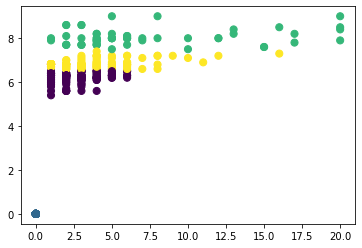

In [660]:
x1 = np.asarray(dfEdmonton['# of Coffee Shops'])
x2 = np.asarray(dfEdmonton['Top Coffee Shop Rating'])
colors = np.asarray(dfEdmonton['Cluster Labels'])
plt.scatter(x1, x2, s=50, c= colors)
plt.show()